# Application of Machine Learning Algorithms for Bipolar Disorder Crisis Prediction
This notebook shows the process of cleaning and plotting different data sets and implementing algorithms to try to predict the episode a patient with Bipolar Disorder might be tending towards, in order to give the doctors treating these patients a second opinion when making a diagnostic.

## Importing the libraries

Basic libraries:

In [544]:
import pandas as pd
import numpy as np
from numpy import random
import sys
from datetime import datetime as dt

Plotting libraries:

In [545]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

## Loading the files into data frames

In [546]:
episodes = pd.read_csv('./data/episodios.csv', sep=';')
young = pd.read_csv('./data/young.csv', sep=';')
hamilton = pd.read_csv('./data/hamilton.csv', sep=';')
interviews = pd.read_csv('./data/diario.csv', sep=';')
interventions = pd.read_csv('./data/intervenciones.csv', sep=';')

## Data cleaning

Cleaning the data before applying different algorithms to create predictive models is essential with almost all the data sets, but especially with data sets that have very small amounts of data, which is our case. This is because noise and outliers in our data sets can affect the accuracy of our models a lot.

We can drop patient with code 'O' from all the data sets as there are no clear episodes of Mania or Depression

In [547]:
episodes = episodes[episodes['PACIENTE'] != 'O']
young = young[young['Código'] != 'O']
hamilton = hamilton[hamilton['Código'] != 'O']
interviews = interviews[interviews['Código'] != 'O']
interventions = interventions[interventions['Código'] != 'O']

### Episode data set

In [548]:
episodes

,PACIENTE,INICIO,FIN,EPISODIO
0,D,01/07/2017,24/07/2017,DEPRESIÓN
1,D,15/08/2017,11/09/2917,DEPRESIÓN
2,G,24/07/2017,07/08/2017,DEPRESIÓN
3,G,04/09/2017,01/11/2017,MANIA
5,M,07/06/2017,01/07/2017,MANIA
6,M,14/07/2017,30/07/2017,DEPRESIÓN
7,M,25/09/2017,10/10/2017,DEPRESIÓN


Renaming the columns:

In [549]:
episodes.columns = ['patient', 'start', 'end', 'episode']

In [550]:
episodes = episodes.replace(to_replace="DEPRESIÓN", value='D')
episodes = episodes.replace(to_replace="MANIA", value='M')

Let's convert the start and end dates to datetime format so we can compare them later:

In [551]:
from datetime import datetime

for index, row in episodes.iterrows():
    episodes['start'][index] = datetime.strptime(row.start, '%d/%m/%Y')
    episodes['end'][index] = datetime.strptime(row.end, '%d/%m/%Y')

Clean data set:

In [552]:
episodes

,patient,start,end,episode
0,D,2017-07-01 00:00:00,2017-07-24 00:00:00,D
1,D,2017-08-15 00:00:00,2917-09-11 00:00:00,D
2,G,2017-07-24 00:00:00,2017-08-07 00:00:00,D
3,G,2017-09-04 00:00:00,2017-11-01 00:00:00,M
5,M,2017-06-07 00:00:00,2017-07-01 00:00:00,M
6,M,2017-07-14 00:00:00,2017-07-30 00:00:00,D
7,M,2017-09-25 00:00:00,2017-10-10 00:00:00,D


### YMRS data set 

In [553]:
young.head(10)

,Código,Fecha,Observaciones,Euforia,Hiperactividad,Impulso Sexual,Sueño,Irritabilidad,Expresión verbal,Trastornos del curso del pensamiento y el lenguaje,Trastornos del contenido del pensamiento,Agresividad,Apariencia,Conciencia de enfermedad
0,D,26/06/2017,NaN,1,1,0,0,0,2,0,0,0,0,0
1,D,10/07/2017,NaN,0,0,0,0,0,0,0,0,0,0,0
2,D,24/07/2017,NaN,0,0,0,0,0,0,0,0,0,0,0
3,D,21/08/2017,NaN,0,0,0,0,0,0,0,0,0,0,0
4,D,11/09/2017,NaN,0,0,0,0,0,0,0,0,0,0,0
5,D,02/10/2017,NaN,0,0,0,0,0,0,0,0,0,0,0
6,D,04/11/2017,NaN,0,0,0,0,0,0,0,0,0,0,0
7,D,29/12/2017,NaN,0,0,0,0,0,0,0,0,0,0,0
8,D,15/01/2018,NaN,0,0,0,0,0,0,0,0,0,0,0
9,G,06/06/2017,NaN,0,1,0,0,2,2,0,0,0,0,0


We can drop the 'Observaciones' column as all values are 'NaN':

In [554]:
young = young.drop("Observaciones", 1)

Rename the columns:

In [555]:
young.columns = ['code', 'date', 'euphoria', 'hyperactivity', 'sexual_impulse', 'sleep', 'irritability',
                 'verbal_expression', 'language', 'thought', 'aggressiveness', 'appearance', 
                 'illness_awareness']

Sort the columns by date:

In [556]:
young = young.sort_values('date')

Check if there are any null values in the data set:

In [557]:
young.isnull().values.any()

False

Let's convert the dates to datetime format so we can compare them later:

In [558]:
from datetime import datetime

for index, row in young.iterrows():
    young['date'][index] = datetime.strptime(row.date, '%d/%m/%Y')
    
young = young.sort_values('date')

The clean dataset looks like this:

In [559]:
young.head(10)

,code,date,euphoria,hyperactivity,sexual_impulse,sleep,irritability,verbal_expression,language,thought,aggressiveness,appearance,illness_awareness
9,G,2017-06-06 00:00:00,0,1,0,0,2,2,0,0,0,0,0
10,G,2017-06-16 00:00:00,0,0,0,0,0,2,0,0,0,0,0
23,M,2017-06-21 00:00:00,0,1,0,0,0,2,0,0,2,0,0
22,M,2017-06-21 00:00:00,0,1,0,0,0,2,0,0,2,0,0
0,D,2017-06-26 00:00:00,1,1,0,0,0,2,0,0,0,0,0
25,M,2017-07-03 00:00:00,0,0,0,0,0,0,0,0,0,0,0
24,M,2017-07-03 00:00:00,0,0,0,0,0,0,0,0,0,0,0
11,G,2017-07-03 00:00:00,0,0,0,0,0,0,0,0,0,0,0
1,D,2017-07-10 00:00:00,0,0,0,0,0,0,0,0,0,0,0
12,G,2017-07-12 00:00:00,0,2,0,0,2,0,0,0,0,0,0


### HDRS data set

In [560]:
hamilton.head(10)

,Código,Tipo de intervención,Fecha,Humor deprimido,Sensación de culpabilidad,Suicidio,Insomnio precoz,Insomnio medio,Expresión verbal,Trastornos del curso del pensamiento y el lenguaje,...,"Inhibición (lentitudde pensamiento y de palabra, empeoramiento de la concentración, actividad motora disminuida)",Agitación,Ansiedad psíquica,Ansiedad somática,Síntomas somáticos gastrointestinales,Síntomas somáticos generales,Síntomas genitales,Hipocondria,Pérdida de peso,Conciencia de enfermedad
0,D,NaN,11/07/2017,3,0,0,0,0,0,0,...,NaN,0.0,2,3,0,1,3.0,0.0,0,0.0
1,D,NaN,24/07/2017,0,0,0,0,0,0,0,...,0.0,0.0,0,0,0,0,0.0,0.0,0,0.0
2,D,NaN,21/08/2017,2,1,0,0,0,0,0,...,0.0,1.0,1,0,0,0,0.0,0.0,0,0.0
3,D,NaN,11/09/2017,0,0,0,0,0,0,0,...,0.0,0.0,0,0,0,0,0.0,0.0,0,NaN
4,D,NaN,02/10/2017,1,0,0,0,0,0,0,...,0.0,0.0,0,0,0,0,0.0,0.0,0,0.0
5,D,NaN,26/06/2017,0,0,0,0,0,0,0,...,0.0,0.0,0,0,0,0,0.0,0.0,0,0.0
6,D,NaN,10/07/2017,1,0,0,0,0,0,0,...,0.0,0.0,0,0,0,0,0.0,0.0,0,0.0
7,D,NaN,04/11/2017,0,0,0,0,0,0,0,...,0.0,0.0,0,0,0,0,0.0,0.0,0,0.0
8,D,NaN,29/12/2017,0,0,0,0,0,0,0,...,0.0,0.0,0,0,0,0,0.0,0.0,0,0.0
9,D,NaN,15/01/2018,0,0,0,0,0,0,0,...,0.0,0.0,0,0,0,0,0.0,0.0,0,0.0


We can drop the 'Tipo de intervención' column as all values are 'NaN':

In [561]:
hamilton = hamilton.drop("Tipo de intervención", 1)

Rename the columns:

In [562]:
hamilton.columns = ['code', 'date', 'depressed_mood', 'guilt', 'suicide', 'precocious_insomnia',
                    'medium_insomnia', 'verbal_expression', 'language', 'thought', 'late_insomnia',
                    'work', 'retardation', 'agitation', 'psychic_anxiety', 'somatic_anxiety',
                    'somatic_gastrointestinal_symptoms','somatic_general_symptoms','genital_symptoms',
                    'hypochondria', 'weight_loss', 'illness_awareness']

Sort the columns by date:

In [563]:
hamilton = hamilton.sort_values('date')

Check if there are any null values in the data set:

In [564]:
hamilton.isnull().values.any()

True

Because there are null values in the dataset, 
we can check which columns have null values and how many there are:

In [565]:
null_columns=hamilton.columns[hamilton.isnull().any()]
hamilton[null_columns].isnull().sum()

retardation          1
agitation            1
illness_awareness    1
dtype: int64

Check the rows where the previous columns are null:

In [566]:
print(hamilton[hamilton.isnull().any(axis=1)][null_columns].head())

    retardation  agitation  illness_awareness
0           NaN        0.0                0.0
3           0.0        0.0                NaN
14          0.0        NaN                0.0


Knowing which rows are null, we can check the previous row and the row after to see if we can give the row a value similar to those:

In [567]:
print hamilton.at[1, 'retardation']

0.0


In [568]:
print hamilton.at[2, 'illness_awareness']
print hamilton.at[4, 'illness_awareness']

0.0
0.0


In [569]:
print hamilton.at[13, 'agitation']
print hamilton.at[15, 'agitation']

0.0
0.0


As we can see, the values are 0, so we can fill the missing values with the same value, so it doesn't vary too much:

In [570]:
hamilton = hamilton.set_value(0, 'retardation', 0.0)
hamilton = hamilton.set_value(3, 'illness_awareness', 0.0)
hamilton = hamilton.set_value(14, 'agitation', 0.0)

Let's check the data types in the data frame:

In [571]:
hamilton.dtypes

code                                  object
date                                  object
depressed_mood                         int64
guilt                                  int64
suicide                                int64
precocious_insomnia                    int64
medium_insomnia                        int64
verbal_expression                      int64
language                               int64
thought                                int64
late_insomnia                          int64
work                                   int64
retardation                          float64
agitation                            float64
psychic_anxiety                        int64
somatic_anxiety                        int64
somatic_gastrointestinal_symptoms      int64
somatic_general_symptoms               int64
genital_symptoms                     float64
hypochondria                         float64
weight_loss                            int64
illness_awareness                    float64
dtype: obj

The values of the HDRS scale are integers, so we can change all the floating point values to integer for easier visualization:

In [572]:
hamilton.retardation = hamilton.retardation.astype(int)
hamilton.agitation = hamilton.agitation.astype(int)
hamilton.genital_symptoms = hamilton.genital_symptoms.astype(int)
hamilton.hypochondria = hamilton.hypochondria.astype(int)
hamilton.illness_awareness = hamilton.illness_awareness.astype(int)

Let's convert the dates to datetime format so we can compare them later:

In [573]:
from datetime import datetime

for index, row in hamilton.iterrows():
    hamilton['date'][index] = datetime.strptime(row.date, '%d/%m/%Y')
    
hamilton = hamilton.sort_values('date')

The clean dataset looks like this:

In [574]:
hamilton.head(5)

,code,date,depressed_mood,guilt,suicide,precocious_insomnia,medium_insomnia,verbal_expression,language,thought,...,retardation,agitation,psychic_anxiety,somatic_anxiety,somatic_gastrointestinal_symptoms,somatic_general_symptoms,genital_symptoms,hypochondria,weight_loss,illness_awareness
10,G,2017-06-06 00:00:00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,G,2017-06-16 00:00:00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36,M,2017-06-21 00:00:00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38,M,2017-06-21 00:00:00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,D,2017-06-26 00:00:00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Interview data set

In [575]:
interviews.head(5)

,Estado de ánimo,Motivación,Problemas de concentración y atención,Irritabilidad,Ansiedad,Calidad del sueño,Ciclo menstrual,Número de cigarrillos,Cafeína,Alcohol,Otras drogas,Hora de despertar,Hora a la que te dormiste,Código,Fecha
0,2,2,3,3.0,3,3,NaN,34,150,No,No,06:30,23:40,D,01/06/2017
1,2,2,3,3.0,3,3,NaN,38,150,NO,No,06:45,00:15,D,02/06/2017
2,2,1,3,3.0,3,3,NaN,39,120,NO,No,07:00,00:15,D,03/06/2017
3,1,2,2,2.0,2,3,NaN,34,120,No,No,07:00,01:30,D,04/06/2017
4,1,1,3,2.0,2,2,NaN,32,150,No,No,07:00,23:45,D,05/06/2017


Rename the columns:

In [576]:
interviews.columns = ['mood', 'motivation', 'attention', 'irritability', 'anxiety',
                      'sleep_quality', 'menstrual_cycle', 'nr_cigarettes', 'caffeine',
                      'alcohol', 'other_drugs', 'wake up time', 'going to bed time',
                      'patient', 'date']

Let's unify all the string values, so they all have the same syntax:

In [577]:
interviews = interviews.replace(to_replace="NO", value="No")
interviews = interviews.replace(to_replace="SI", value="Si")

We can now map the Yes/No features, giving them a numerical value:

In [578]:
interviews = interviews.replace(to_replace="No", value=0)
interviews = interviews.replace(to_replace="Si", value=1)

Let's remove the colons from the strings in the data frame:

In [579]:
interviews = interviews.replace(to_replace=":", value="")
interviews['wake up time'] = interviews['wake up time'].str.replace(':','')
interviews['going to bed time'] = interviews['going to bed time'].str.replace(':','')

As the sleeping time overlaps different days, it could be interesting to know how many hours the patient has been active instead of the hours of sleep. If the patient has gone to bed after midnight, we have to add 24 hours in order to get the correct number of active hours.

In [580]:
interviews = interviews.apply(pd.to_numeric, errors='ignore')
interviews.loc[interviews['going to bed time'] < interviews['wake up time'], 'going to bed time'] = interviews['going to bed time'] + 2400
interviews['active_time'] = abs((interviews['wake up time'] - interviews['going to bed time']).astype(int))

After calculating the amount of time the patient has been active, we can drop the 'wake up time' and 'going to bed time' columns, as we no longer need them:

In [581]:
interviews = interviews.drop('wake up time', 1)
interviews = interviews.drop('going to bed time', 1)

Check if there are any null values in the data set:

In [582]:
interviews.isnull().values.any()

True

Because there are null values in the dataset, we can check which columns have null values and how many there are:

In [583]:
null_columns=interviews.columns[interviews.isnull().any()]
interviews[null_columns].isnull().sum()

irritability         1
menstrual_cycle    647
date                 1
dtype: int64

The 'menstrual_cycle' feature values are null in all the rows, either because all the patients are men or because they were not recorded, so the smartest move is to drop the whole column, as there is no point in making up any values:

In [584]:
interviews = interviews.drop("menstrual_cycle", 1)

In [585]:
null_columns=interviews.columns[interviews.isnull().any()]
print(interviews[interviews.isnull().any(axis=1)][null_columns])

     irritability        date
306           NaN  19/08/2017
533           1.0         NaN


In the case of the 'irritability' value, we do exactly like we did with the HDRS data frame, checking the value of the previous row and the row after.

In [586]:
print interviews.at[305, 'irritability']
print interviews.at[307, 'irritability']

1.0
1.0


The value is 1.0, in both rows, so we give that same value to it:

In [587]:
interviews = interviews.set_value(306, 'irritability', 1.0)

In case of the date, we know that the interview must have been after the previous one and before the one in the next row:

In [588]:
print interviews.at[532, 'date']
print interviews.at[534, 'date']

03/07/2017
05/07/2017


We fill the value with the missing day:

In [589]:
interviews = interviews.set_value(533, 'date', str('04/07/2017'))

Let's check the data types in the data frame:

In [590]:
interviews.dtypes

mood               int64
motivation         int64
attention          int64
irritability     float64
anxiety            int64
sleep_quality      int64
nr_cigarettes      int64
caffeine           int64
alcohol            int64
other_drugs        int64
patient           object
date              object
active_time        int64
dtype: object

The values of the YMRS scale are integers, so we the 'irritability'' column value to integer for easier visualization:

In [591]:
interviews.irritability = interviews.irritability.astype(int)

Let's convert the dates to datetime format so we can compare them later:

In [592]:
from datetime import datetime

for index, row in interviews.iterrows():
    interviews['date'][index] = datetime.strptime(row.date, '%d/%m/%Y')
    
interviews = interviews.sort_values('date')

The clean dataset looks like this:

In [593]:
interviews.head(5)

,mood,motivation,attention,irritability,anxiety,sleep_quality,nr_cigarettes,caffeine,alcohol,other_drugs,patient,date,active_time
274,0,1,1,1,1,2,0,90,0,0,G,2007-07-17 00:00:00,1470
230,-1,-1,2,1,1,3,24,120,0,0,D,2017-01-02 00:00:00,1790
241,0,-1,2,1,1,1,24,90,0,0,D,2017-01-15 00:00:00,1545
0,2,2,3,3,3,3,34,150,0,0,D,2017-06-01 00:00:00,1710
1,2,2,3,3,3,3,38,150,0,0,D,2017-06-02 00:00:00,1770


### Intervention data set

In [594]:
interventions.head(5)

,Código,Profesional,Tipo de intervención,Asiste,Fecha,EEAG,Clasifique el alivio obtenido en estos momentos respecto a la anterior consulta
0,D,DU,Consulta,yes,01/06/2017,80,5. Un poco peor
1,D,DU,Consulta,yes,01/06/2017,80,5. Un poco peor
2,D,EM,Consulta,yes,19/06/2017,80,3. Un poco mejor
3,D,DU,Vídeo,yes,26/06/2017,85,3. Un poco mejor
4,D,DU,Consulta,yes,10/07/2017,80,6. Mucho peor


We drop the rows that have 'NaN' values in the 'EEAG' row as we don't want to risk making values up:

In [595]:
interventions = interventions.dropna()

Rename the columns:

In [596]:
interventions.columns = ['code', 'doctor', 'type', 'attends', 'date', 'gaf', 'relief']

In [597]:
interventions.head(10)

,code,doctor,type,attends,date,gaf,relief
0,D,DU,Consulta,yes,01/06/2017,80,5. Un poco peor
1,D,DU,Consulta,yes,01/06/2017,80,5. Un poco peor
2,D,EM,Consulta,yes,19/06/2017,80,3. Un poco mejor
3,D,DU,Vídeo,yes,26/06/2017,85,3. Un poco mejor
4,D,DU,Consulta,yes,10/07/2017,80,6. Mucho peor
5,D,DU,Teléfono,yes,12/07/2017,50,7. Muchísimo peor
7,D,EM,Consulta,yes,17/07/2017,60,5. Un poco peor
8,D,DU,Vídeo,yes,24/07/2017,85,2. Mucho mejor
9,D,DU,Consulta,yes,21/08/2017,70,5. Un poco peor
10,D,EM,Consulta,yes,29/08/2017,70,5. Un poco peor


The doctor that did the intervention ('doctor') and the type of intervention ('type') are not relevant for our study, so we can drop the columns.

In [598]:
interventions = interventions.drop("doctor", 1)
interventions = interventions.drop("type", 1)

The scheduled interventions that the patients did not attend to are not adding any additional value to the study, so we can drop the corresponding rows:

In [599]:
interventions = interventions[interventions['attends'] != 'no']

Now we can drop the column that says if the patient attended the intervention or not, because are the rows are from interventions the patient attended to:

In [600]:
interventions = interventions.drop("attends", 1)

Now, for the 'relief' column, we can just take the numerical value, ranging from 1 to 7:

In [601]:
pd.options.mode.chained_assignment = None
for index, row in interventions.iterrows():
    splits = row.relief.split('.')
    interventions['relief'][index] = splits[0]
    
interventions.relief = interventions.relief.astype(int)

Let's convert the dates to datetime format so we can compare them later:

In [602]:
from datetime import datetime

for index, row in interventions.iterrows():
    interventions['date'][index] = datetime.strptime(row.date, '%d/%m/%Y')
    
interventions = interventions.sort_values('date')

The clean dataset looks like this:

In [603]:
interventions.head(5)

,code,date,gaf,relief
0,D,2017-06-01 00:00:00,80,5
1,D,2017-06-01 00:00:00,80,5
20,G,2017-06-06 00:00:00,80,1
68,M,2017-06-07 00:00:00,60,3
21,G,2017-06-12 00:00:00,70,5


After cleaning the data, we can save them as .csv files so we can import them later:

In [604]:
young.to_csv('./clean_data/ymrs.csv', sep=';')
hamilton.to_csv('./clean_data/hdrs.csv', sep=';')
interviews.to_csv('./clean_data/interviews.csv', sep=';')
interventions.to_csv('./clean_data/interventions.csv', sep=';')

## Exploratory Data Analysis

In order to get a better understanding of our data, visualizing different graphs, maps and plots is essential. Therefore, we are going to make interesting plots of each of the data sets as well as of the combination of them.
It is not necessary to plot the Episode data set, because it only contains information about the different episodes the patients went through.

### YMRS data set

Before plotting, we remove the 'date' and 'code' columns so that we only have numerical data:

In [62]:
young_plot = young.drop("date", 1)
young_plot = young_plot.drop("code", 1)

We also want to know which columns have more than one value so that they can be plotted:

In [63]:
young_plot.columns

Index([u'euphoria', u'hyperactivity', u'sexual_impulse', u'sleep',
       u'irritability', u'verbal_expression', u'language', u'thought',
       u'aggressiveness', u'appearance', u'illness_awareness'],
      dtype='object')

We can create a function that tells us which variables are "plottable", which means that they have more than one value, because we can't plot singular matrices:

In [64]:
def get_plottable_columns(df):
    for column in df:
        print column, ": ",
        n_values = len(df[column].unique())
        if n_values > 1:
            print "Yes, ", n_values, " values" 
        else:
            print "No, 1 value"

In [65]:
get_plottable_columns(young_plot)

euphoria :  Yes,  2  values
hyperactivity :  Yes,  3  values
sexual_impulse :  No, 1 value
sleep :  No, 1 value
irritability :  Yes,  2  values
verbal_expression :  Yes,  2  values
language :  Yes,  2  values
thought :  No, 1 value
aggressiveness :  Yes,  2  values
appearance :  No, 1 value
illness_awareness :  No, 1 value


In [66]:
young_plot = young_plot.drop("sexual_impulse", 1)
young_plot = young_plot.drop("sleep", 1)
young_plot = young_plot.drop("thought", 1)
young_plot = young_plot.drop("appearance", 1)
young_plot = young_plot.drop("illness_awareness", 1)

#### Histograms

Histograms give a good overview on how the data is distributed, although it depends on the bins that are chosen, which are the intervals in which the data is classified into. This might not always be the perfect way to represent the data, as the whole of the dataset is not plotted.

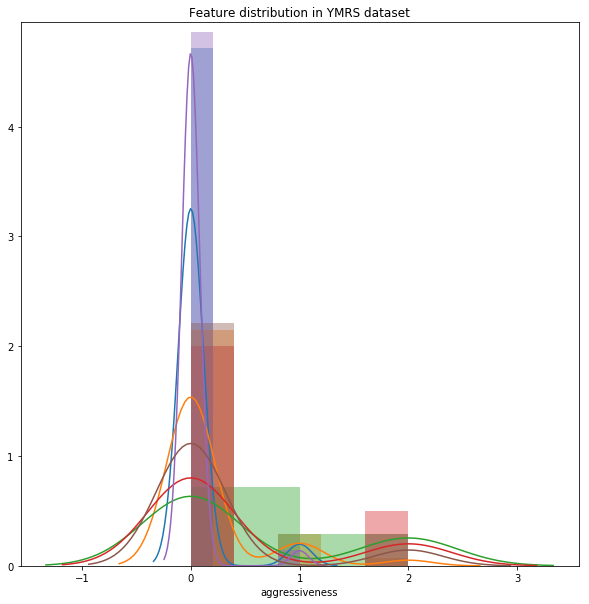

In [460]:
f, axes = plt.subplots(figsize=(10, 10))
sns_plot = sns.distplot(young_plot['euphoria'])
sns_plot = sns.distplot(young_plot['hyperactivity'])
sns_plot = sns.distplot(young_plot['irritability'])
sns_plot = sns.distplot(young_plot['verbal_expression'])
sns_plot = sns.distplot(young_plot['language'])
sns_plot = sns.distplot(young_plot['aggressiveness'])
plt.title('Feature distribution in YMRS dataset');
fig = sns_plot.get_figure()
fig.savefig("histogram_ymrs_1.png")

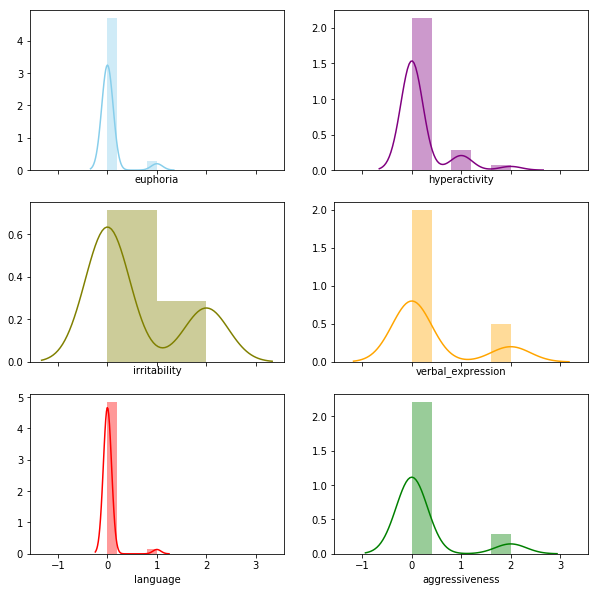

In [68]:
f, axes = plt.subplots(3, 2, figsize=(10, 10), sharex=True)
sns.distplot( young_plot["euphoria"], color="skyblue", ax=axes[0, 0])
sns.distplot( young_plot["hyperactivity"], color="purple", ax=axes[0, 1])
sns_plot = sns.distplot( young_plot["irritability"], color="olive", ax=axes[1, 0])
sns_plot = sns.distplot( young_plot["verbal_expression"], color="orange", ax=axes[1, 1])
sns_plot = sns.distplot( young_plot["language"], color="red", ax=axes[2, 0])
sns_plot = sns.distplot( young_plot["aggressiveness"], color="green", ax=axes[2, 1]);
fig = sns_plot.get_figure()
fig.savefig("histogram_ymrs_2.png")

As we can see, most of the columns only have two values in the dataset, which doesn't give us a lot of information. In all the plotted features, the value that is represented the most is 0.

#### Heatmaps

Heatmaps let us see the correlation combinations between different values in a dataset with a colour scale that represents a higher or lower correlation.

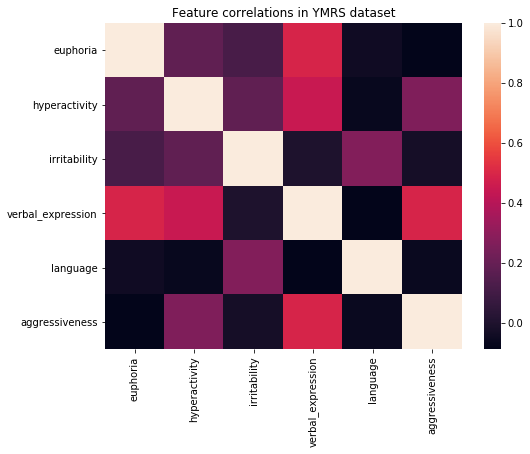

In [69]:
f, axes = plt.subplots(figsize=(8, 6))
corr = young_plot.corr()
sns_plot = sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.title('Feature correlations in YMRS dataset');
fig = sns_plot.get_figure()
fig.savefig("heatmap_ymrs.png")

We can see that the variables with highest correlation are 'hyperactivity' and 'verbal_expression'. It is also interesting to see that 'aggressiveness' and 'verbal_expression' are correlated, which is almost self-explanatory. It tells us that the if the patient talks a lot, it will probably be accompanied by excessive energy or hyperactivity (Disruptive-Aggressive Behaviour).

#### Scatterplots

Scatterplots are very useful for studying the relationship between different variables. We are going to plot a matrix with all the variables so we can see if any relation needs a closer look.

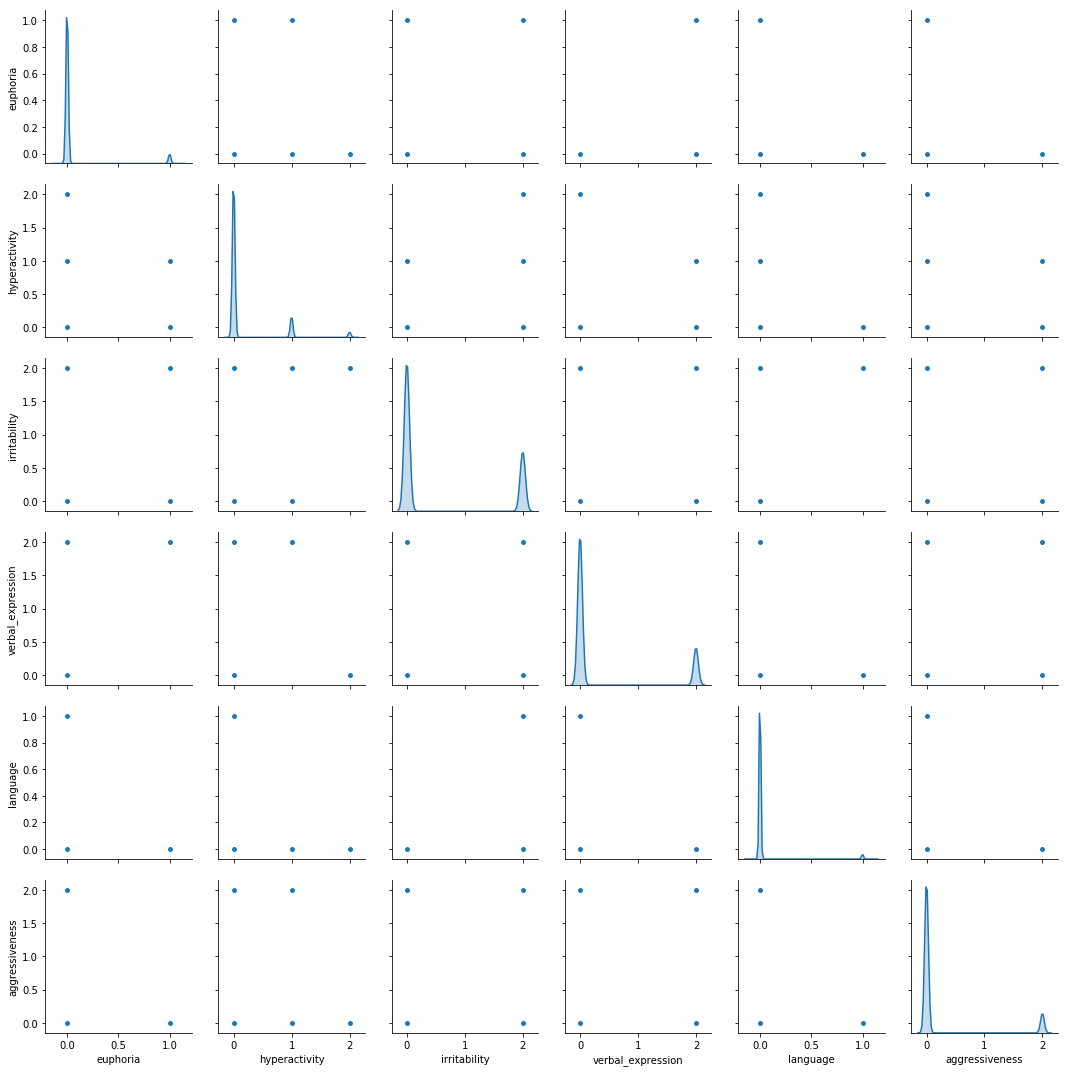

In [70]:
sns_plot = sns.pairplot(young_plot, diag_kind="kde", diag_kws=dict(shade=True, bw=.05, vertical=False));
sns_plot.savefig("matrix_ymrs.png")

We can see that 'hyperactivity' and 'irritability' could be correlated. Let's make a marginal plot with both features, which shows both the correlation and the distribution:

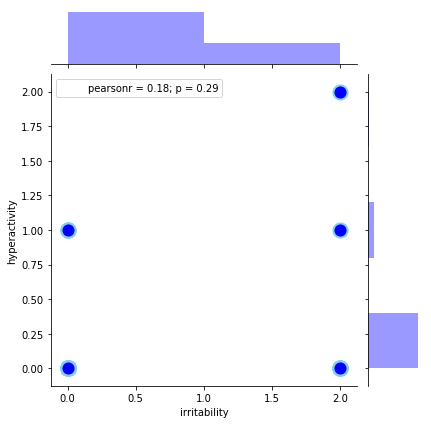

In [71]:
sns_plot = sns.jointplot(x=young_plot["irritability"], y=young_plot["hyperactivity"], kind='scatter',
              s=200, color='b', edgecolor="skyblue", linewidth=2);
sns_plot.savefig("marginal_ymrs_1.png")

Let's make a 2D density plot to further visualize the relationship between these two variables. This kind of plot is an extension of the histogram. It shows the distribution of both variables and is quite useful to avoid overplotting, which is a problem we don't have right now but might have in the future when we have more data.

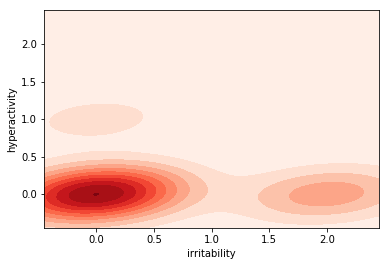

In [72]:
sns_plot = sns.kdeplot(young_plot.irritability, young_plot.hyperactivity, cmap="Reds", shade=True, bw=.15);
fig = sns_plot.get_figure()
fig.savefig("density_ymrs_1.png")

As we can see, most of the values are concentrated around the (0,0) point, and we can't really see a correlation between them.

Let's do the same with 'verbal_expression' (speech) and 'euphoria' (Elevated mood):

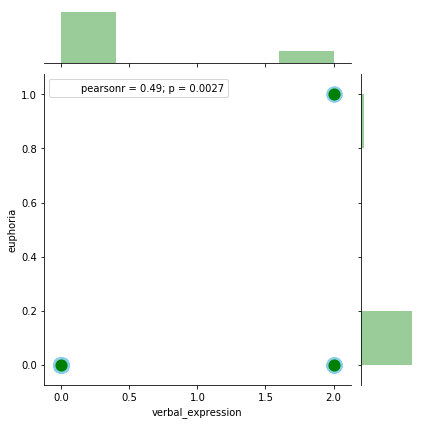

In [73]:
sns_plot = sns.jointplot(x=young_plot["verbal_expression"], y=young_plot["euphoria"], kind='scatter',
              s=200, color='g', edgecolor="skyblue", linewidth=2);
sns_plot.savefig("marginal_ymrs_2.png")

The same happens with these two variables, as both have a lot of rows with value 0.

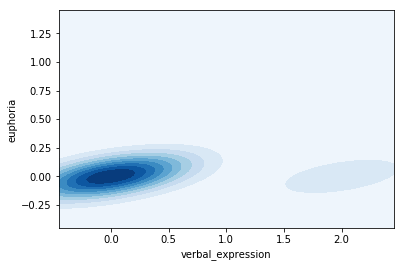

In [74]:
sns_plot = sns.kdeplot(young_plot.verbal_expression, young_plot.euphoria, cmap="Blues", shade=True, bw=.15);
fig = sns_plot.get_figure()
fig.savefig("density_ymrs_2.png")

There are some independent values of 'verbal_expression' around 2, but it is also possible to see a slight correlation between both variables. This means that the higher the rate of speech of the patient, the more euphoric he or she will be and vice versa.

### HDRS data set

Before plotting, we remove the 'date' and 'code' columns so that we only have numerical data:

In [75]:
hamilton_plot = hamilton.drop("date", 1)
hamilton_plot = hamilton_plot.drop("code", 1)

We also want to know which columns have more than one value so that they can be plotted:

In [76]:
hamilton_plot.columns

Index([u'depressed_mood', u'guilt', u'suicide', u'precocious_insomnia',
       u'medium_insomnia', u'verbal_expression', u'language', u'thought',
       u'late_insomnia', u'work', u'retardation', u'agitation',
       u'psychic_anxiety', u'somatic_anxiety',
       u'somatic_gastrointestinal_symptoms', u'somatic_general_symptoms',
       u'genital_symptoms', u'hypochondria', u'weight_loss',
       u'illness_awareness'],
      dtype='object')

Using the function created above, we can check which variables are worth to plot and which can be dropped for this part:

In [77]:
get_plottable_columns(hamilton_plot)

depressed_mood :  Yes,  4  values
guilt :  Yes,  3  values
suicide :  Yes,  3  values
precocious_insomnia :  Yes,  3  values
medium_insomnia :  Yes,  3  values
verbal_expression :  No, 1 value
language :  No, 1 value
thought :  No, 1 value
late_insomnia :  Yes,  2  values
work :  Yes,  4  values
retardation :  Yes,  2  values
agitation :  Yes,  2  values
psychic_anxiety :  Yes,  3  values
somatic_anxiety :  Yes,  3  values
somatic_gastrointestinal_symptoms :  Yes,  2  values
somatic_general_symptoms :  Yes,  2  values
genital_symptoms :  Yes,  3  values
hypochondria :  No, 1 value
weight_loss :  No, 1 value
illness_awareness :  No, 1 value


In [78]:
hamilton_plot = hamilton_plot.drop("verbal_expression", 1)
hamilton_plot = hamilton_plot.drop("language", 1)
hamilton_plot = hamilton_plot.drop("thought", 1)
hamilton_plot = hamilton_plot.drop("hypochondria", 1)
hamilton_plot = hamilton_plot.drop("weight_loss", 1)
hamilton_plot = hamilton_plot.drop("illness_awareness", 1)

#### Histograms

As seen above, histograms give a good overview on how the data from the data set is distributed.

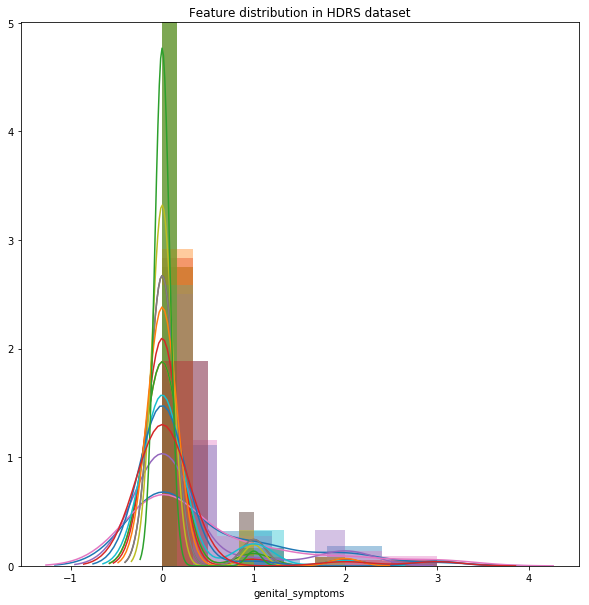

In [79]:
f, axes = plt.subplots(figsize=(10, 10))
sns_plot = sns.distplot(hamilton_plot['depressed_mood'])
sns_plot = sns.distplot(hamilton_plot['guilt'])
sns_plot = sns.distplot(hamilton_plot['suicide'])
sns_plot = sns.distplot(hamilton_plot['precocious_insomnia'])
sns_plot = sns.distplot(hamilton_plot['medium_insomnia'])
sns_plot = sns.distplot(hamilton_plot['late_insomnia'])
sns_plot = sns.distplot(hamilton_plot['work'])
sns_plot = sns.distplot(hamilton_plot['retardation'])
sns_plot = sns.distplot(hamilton_plot['agitation'])
sns_plot = sns.distplot(hamilton_plot['psychic_anxiety'])
sns_plot = sns.distplot(hamilton_plot['somatic_anxiety'])
sns_plot = sns.distplot(hamilton_plot['somatic_gastrointestinal_symptoms'])
sns_plot = sns.distplot(hamilton_plot['somatic_general_symptoms'])
sns_plot = sns.distplot(hamilton_plot['genital_symptoms'])
plt.title('Feature distribution in HDRS dataset');
fig = sns_plot.get_figure()
fig.savefig("histogram_hdrs_1.png")

In the histogram above we can see that all the variables are distributed in a similar way and almost all values are concentrated around 0.

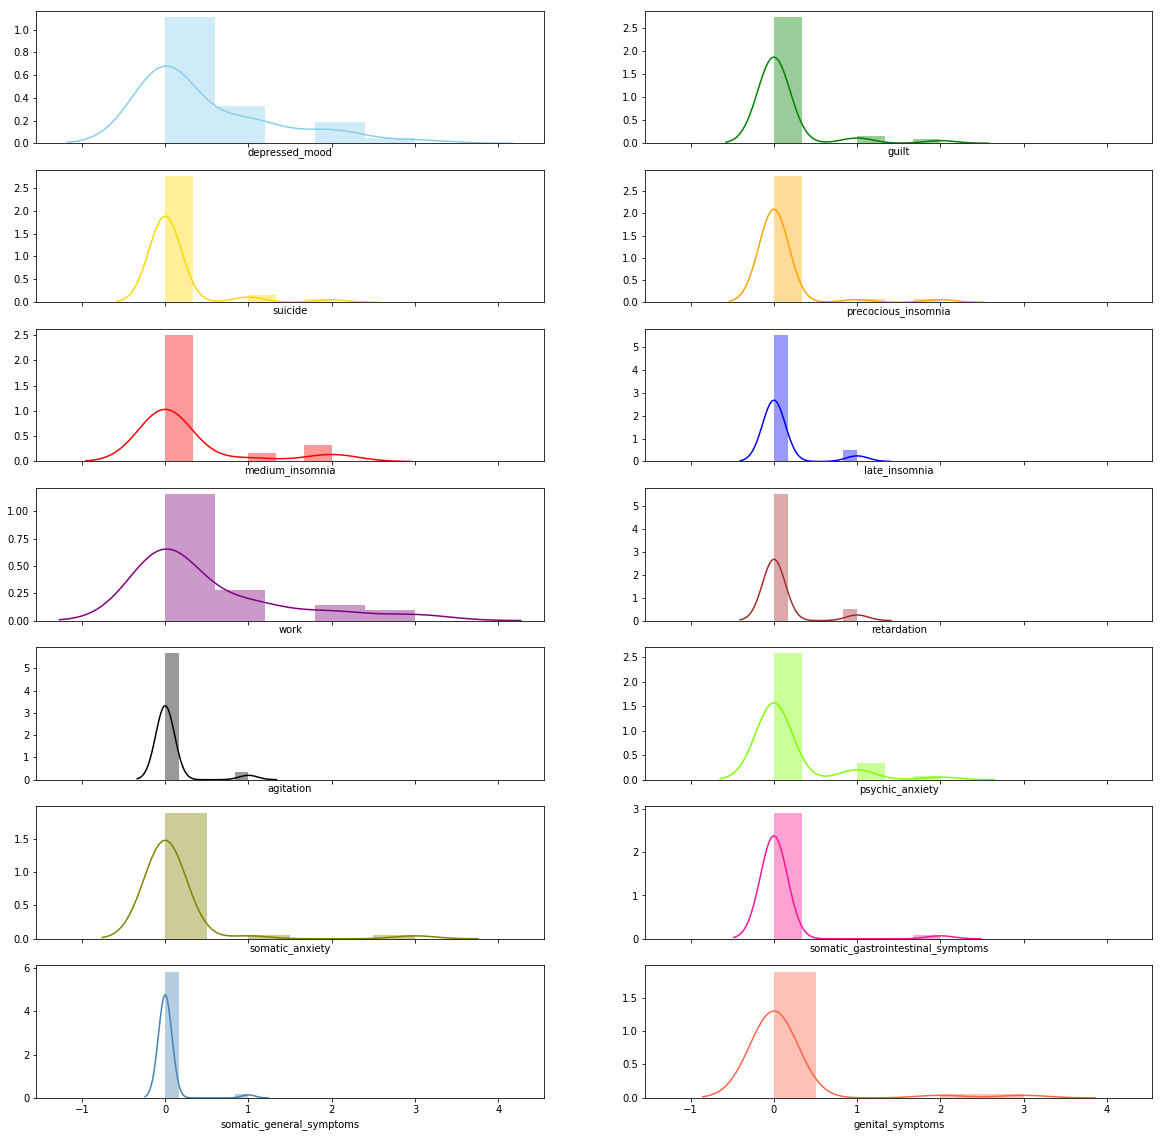

In [80]:
f, axes = plt.subplots(7, 2, figsize=(20, 20), sharex=True)
sns_plot = sns.distplot( hamilton_plot['depressed_mood'], color="skyblue", ax=axes[0, 0])
sns_plot = sns.distplot( hamilton_plot['guilt'], color="green", ax=axes[0, 1])
sns_plot = sns.distplot( hamilton_plot['suicide'], color="gold", ax=axes[1, 0])
sns_plot = sns.distplot( hamilton_plot['precocious_insomnia'], color="orange", ax=axes[1, 1])
sns_plot = sns.distplot( hamilton_plot['medium_insomnia'], color="red", ax=axes[2, 0])
sns_plot = sns.distplot( hamilton_plot['late_insomnia'], color="blue", ax=axes[2, 1])
sns_plot = sns.distplot( hamilton_plot['work'], color="purple", ax=axes[3, 0])
sns_plot = sns.distplot( hamilton_plot['retardation'], color="brown", ax=axes[3, 1])
sns_plot = sns.distplot( hamilton_plot['agitation'], color="black", ax=axes[4, 0])
sns_plot = sns.distplot( hamilton_plot['psychic_anxiety'], color="chartreuse", ax=axes[4, 1])
sns_plot = sns.distplot( hamilton_plot['somatic_anxiety'], color="olive", ax=axes[5, 0])
sns_plot = sns.distplot( hamilton_plot['somatic_gastrointestinal_symptoms'], color="deeppink", ax=axes[5, 1])
sns_plot = sns.distplot( hamilton_plot['somatic_general_symptoms'], color="steelblue", ax=axes[6, 0])
sns_plot = sns.distplot( hamilton_plot['genital_symptoms'], color="tomato", ax=axes[6, 1]);
fig = sns_plot.get_figure()
fig.savefig("histogram_hdrs_2.png")

The distribution curve is quite similar for all the variables. The variables that have a better distribution (more values) are 'work' and 'depressed_mood'. It is quite interesting to see that 'suicide' and 'precocious_insomnia' (insomnia early in the night) have almost the same distribution.

#### Heatmaps

Let's try to find which variables are correlated in the HDRS data set with the help of a heatmap.

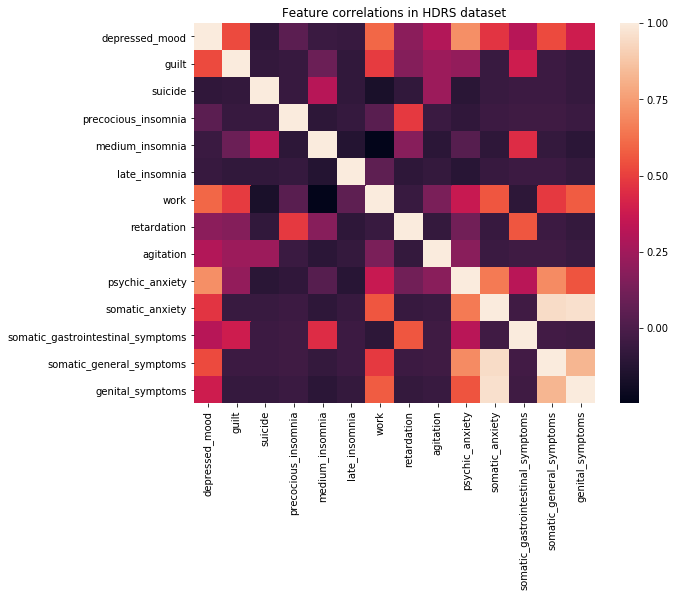

In [81]:
f, axes = plt.subplots(figsize=(9, 7))
corr = hamilton_plot.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.title('Feature correlations in HDRS dataset');

There are a lot of variables that seem to be correlated in this heatmap. We can see correlations between:
* **'depressed_mood' and 'work':** This tells us that the less a patient is willing to go to work or do other activities that he or she usually does, the more depressed he or she will probably feel.
* **'depressed_mood' and 'psychic_anxiety':** This correlation is quite interesting because it shows a relationship between the level of anxiety of a patient and a depressed mood. If a patient feels anxious he or she will probably feel more depressed than usual.
* **'depressed_mood' and 'somatic_general_symptoms':** This relationship tells us that if a patient is starting to feel heaviness in limbs, back or head (General somatic symptoms = 1) or has clear-cut physical symptoms (General somatic symptoms = 2), the probability of him or her having a more depressed mood is higher.
* **'precocious_insomnia' and 'retardation':** This means that if the doctor starts to notice a slight or obvious retardation in the patient during an interview the patient could find it difficult to sleep early in the night, or vice versa.
* **'work' and 'psychic_anxiety':** This relationship is also related to 'depressed_mood' which means that the three variables are correlated and the values might grow similarly. If the patient is less willing to go to work and do other activities, he or she will probably be feeling more anxious and depressed.
* **'psychic_anxiety' and 'somatic_anxiety':** These two variables could be merged into one, 'anxiety', as they are quite similar and show a clear correlation. We will plot them with a density plot later to confirm the correlation.
* **'psychic_anxiety' and 'somatic_general_symptoms':** This tells us that if the patient is anxious, he or she will most surely have some kind of somatic symptom.
* **'somatic_general_symptoms' and 'genital_symptoms':** This relationship means that a patient with loss of libido or menstrual disturbances will probably present other physical symptoms. We will also plot these two variables with a density plot to see if we can merge them into one feature.

#### Scatterplots

As we did wid the YMRS data set, making scatterplots should give us a hint about which variable relationships we need to look closer into.

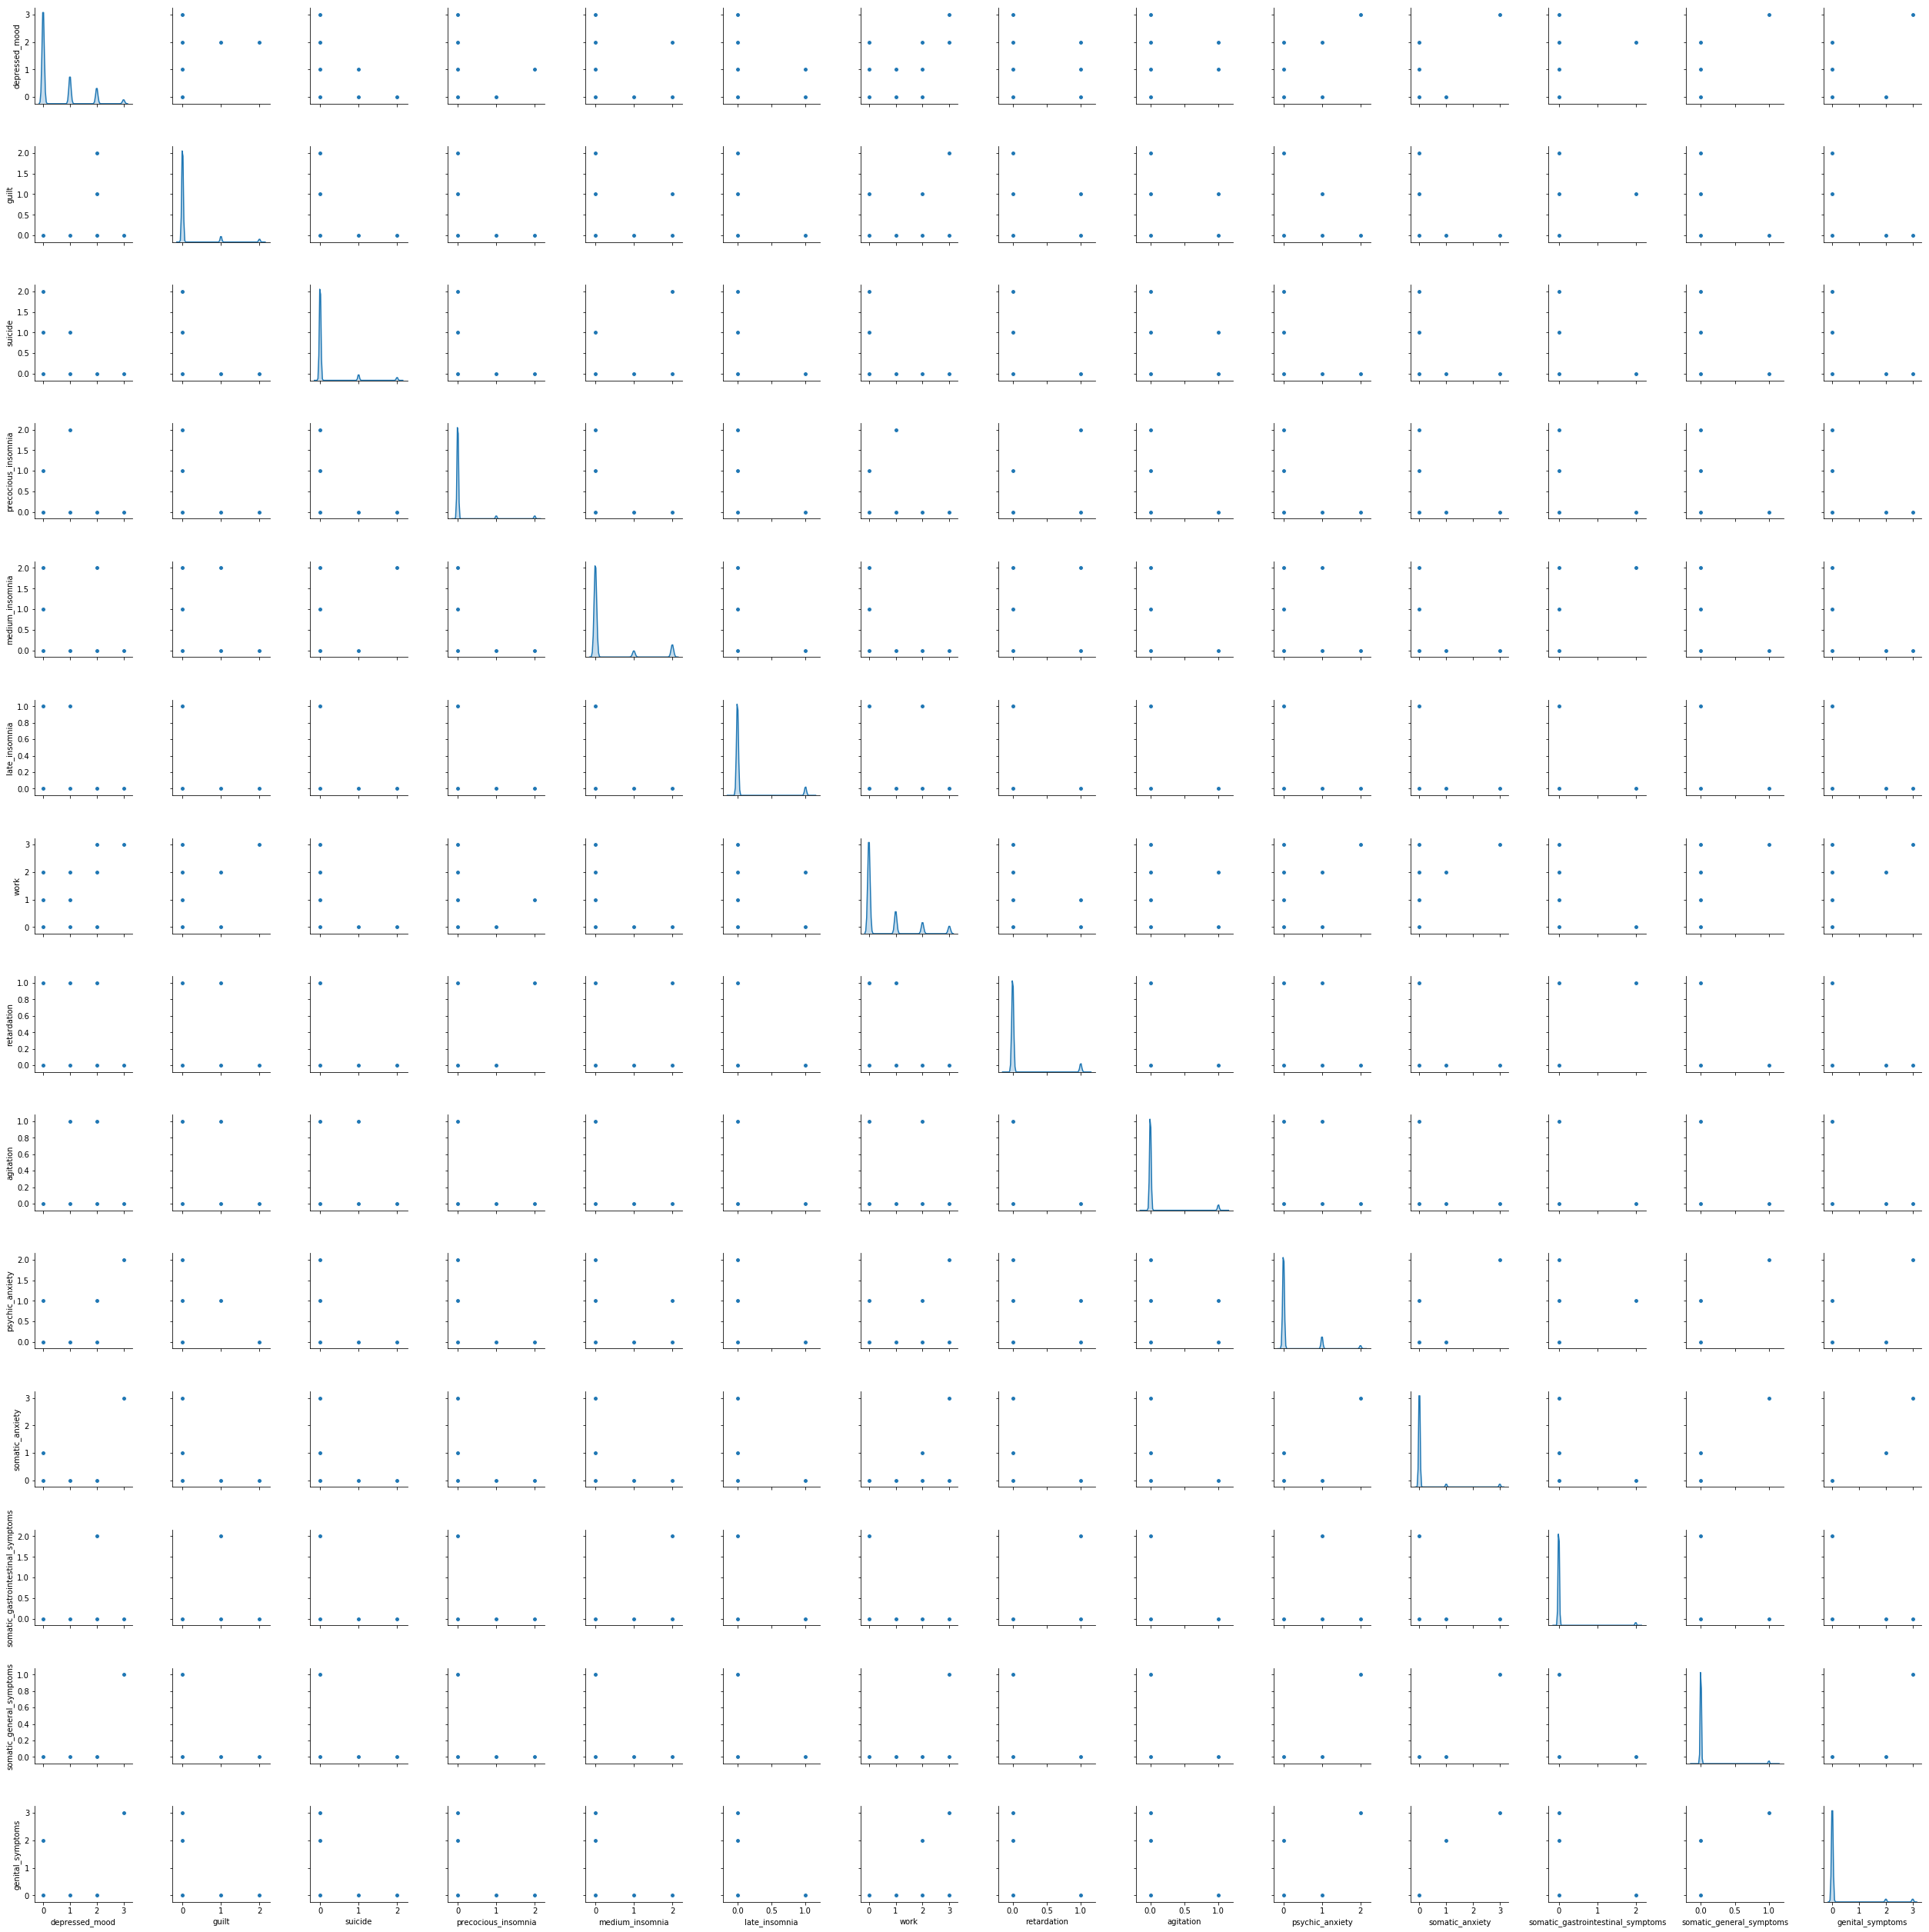

In [82]:
sns_plot = sns.pairplot(hamilton_plot, diag_kind="kde", diag_kws=dict(shade=True, bw=.05, vertical=False));
sns_plot.savefig("matrix_hdrs.png")

In the plot above we can see an equal distribution between 'depressed_mood' and both 'work' and 'psychic_anxiety'. Let's make both a marginal an a 2D density plot to further visualize the relationship between these variables.

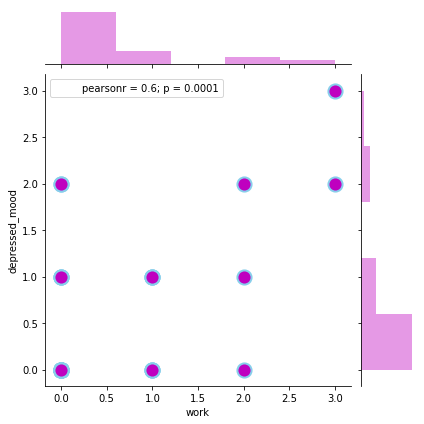

In [83]:
sns_plot = sns.jointplot(x=hamilton_plot["work"], y=hamilton_plot["depressed_mood"], kind='scatter',
              s=200, color='m', edgecolor="skyblue", linewidth=2);
sns_plot.savefig("marginal_hdrs_1.png")

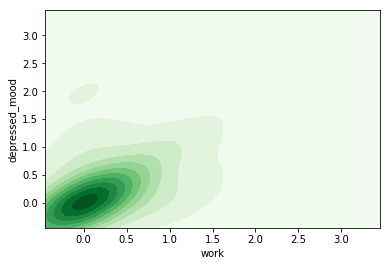

In [84]:
sns_plot = sns.kdeplot(hamilton_plot.work, hamilton_plot.depressed_mood, cmap="Greens", shade=True, bw=.15);
fig = sns_plot.get_figure()
fig.savefig("density_hdrs_1.png")

We can see that most of the values are concentrated between 0 and 1 on both of the variables, and that they have nearly a linear distribution, which tells us that a decrease in a patient's activity could indicate the start of a depression, or that the patient doesn't feel like working the more depressed he or she feels. This confirms what we saw in the heatmap above.

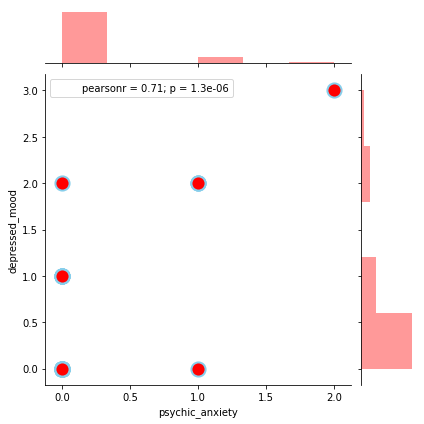

In [85]:
sns_plot = sns.jointplot(x=hamilton_plot["psychic_anxiety"], y=hamilton_plot["depressed_mood"], kind='scatter',
              s=200, color='r', edgecolor="skyblue", linewidth=2);
sns_plot.savefig("marginal_hdrs_2.png")

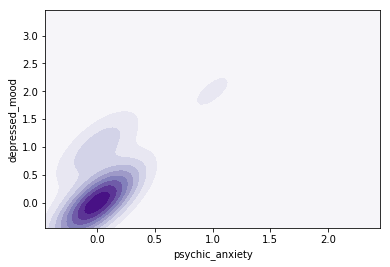

In [86]:
sns_plot = sns.kdeplot(hamilton_plot.psychic_anxiety, hamilton_plot.depressed_mood, cmap="Purples", shade=True, bw=.15);
fig = sns_plot.get_figure()
fig.savefig("density_hdrs_2.png")

The distribution of 'pshychic_anxiety' and 'depressed_mood' is quite clear with the above plot. This could indicate that, for example, if the patient has subjective tension (Psychic anxiety = 1) or starts worrying about minor matters (Psychic anxiety = 2), it is probably because he or she is starting to feel more depressed and reports this state only on questioning or spontaneuosly (Depressed mood = 1 or 2).

Let's plot the relationships we saw in the heatmap ('psychic_anxiety'-'somatic_anxiety' and 'somatic_general_symptoms'-'genital_symptoms') to see if there is a clear correlation between them:

* Psychic Anxiety and Somatic Anxiety:

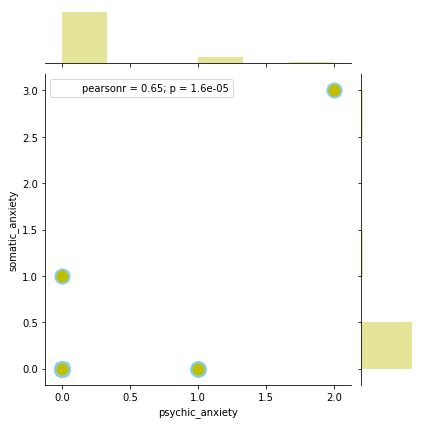

In [87]:
sns_plot = sns.jointplot(x=hamilton_plot["psychic_anxiety"], y=hamilton_plot["somatic_anxiety"], kind='scatter',
              s=200, color='y', edgecolor="skyblue", linewidth=2);
sns_plot.savefig("marginal_hdrs_3.png")

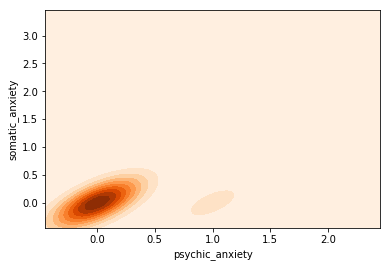

In [88]:
sns_plot = sns.kdeplot(hamilton_plot.psychic_anxiety, hamilton_plot.somatic_anxiety, cmap="Oranges", shade=True, bw=.15);
fig = sns_plot.get_figure()
fig.savefig("density_hdrs_3.png")

We can observe almost a linear relationship between somatic and psychic anxiety in the plot above.

* Somatic General Symptoms and Genital Symptoms:

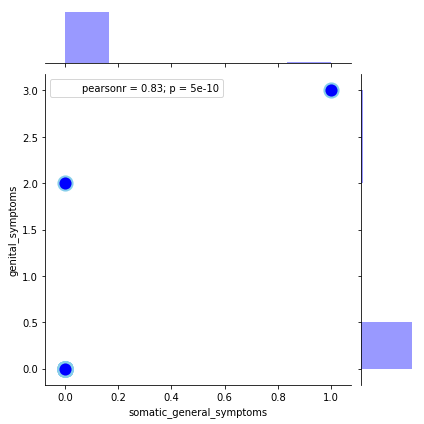

In [89]:
sns.jointplot(x=hamilton_plot["somatic_general_symptoms"], y=hamilton_plot["genital_symptoms"], kind='scatter',
              s=200, color='b', edgecolor="skyblue", linewidth=2);

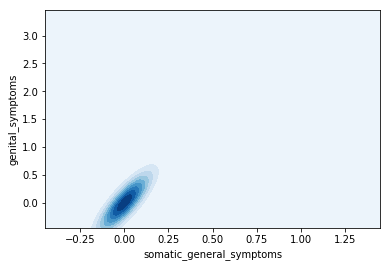

In [90]:
sns.kdeplot(hamilton_plot.somatic_general_symptoms, hamilton_plot.genital_symptoms, cmap="Blues", shade=True, bw=.15);

The correlation between genital symptoms and somatic general symptoms is not as clear as the one between psychic anxiety and somatic anxiety.

Knowing the correlation between psychic anxiety and somatic anxiety exists is quite helpful for the application of the algorithms later in the study, because for some algorithms, highly correlated features might lower the prediction score.

### Interview data set

Before plotting, we remove the 'date' and 'patient' columns so that we only have numerical data:

In [91]:
interviews_plot = interviews.drop("date", 1)
interviews_plot = interviews_plot.drop("patient", 1)

We also want to know which columns have more than one value so that they can be plotted:

In [92]:
interviews_plot.columns

Index([u'mood', u'motivation', u'attention', u'irritability', u'anxiety',
       u'sleep_quality', u'nr_cigarettes', u'caffeine', u'alcohol',
       u'other_drugs', u'active_time'],
      dtype='object')

Using the function created above, we can check which variables are worth to plot and which can be dropped for this part:

In [93]:
get_plottable_columns(interviews_plot)

mood :  Yes,  6  values
motivation :  Yes,  7  values
attention :  Yes,  4  values
irritability :  Yes,  5  values
anxiety :  Yes,  4  values
sleep_quality :  Yes,  5  values
nr_cigarettes :  Yes,  31  values
caffeine :  Yes,  14  values
alcohol :  No, 1 value
other_drugs :  No, 1 value
active_time :  Yes,  132  values


In [94]:
interviews_plot = interviews_plot.drop("alcohol", 1)
interviews_plot = interviews_plot.drop("other_drugs", 1)

#### Histograms

To see how the data is distributed in the interview data set, we plot some histograms.

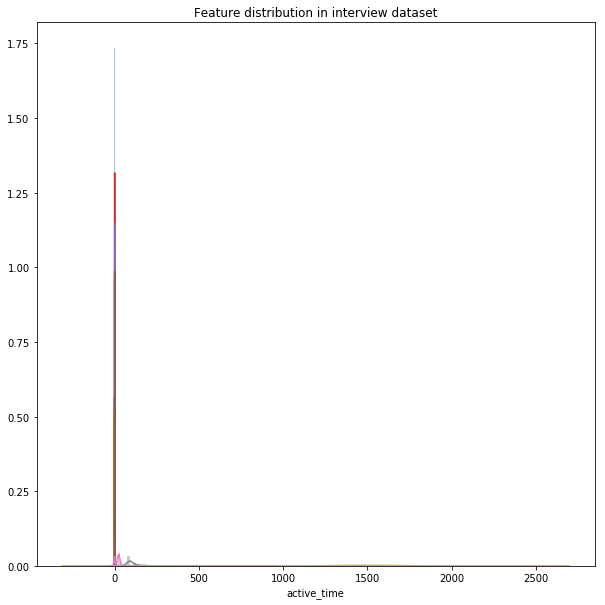

In [95]:
f, axes = plt.subplots(figsize=(10, 10))
sns.distplot(interviews_plot['mood'])
sns.distplot(interviews_plot['motivation'])
sns.distplot(interviews_plot['attention'])
sns.distplot(interviews_plot['irritability'])
sns.distplot(interviews_plot['anxiety'])
sns.distplot(interviews_plot['sleep_quality'])
sns.distplot(interviews_plot['nr_cigarettes'])
sns.distplot(interviews_plot['caffeine'])
sns_plot = sns.distplot(interviews_plot['active_time'])
plt.title('Feature distribution in interview dataset');

fig = sns_plot.get_figure()
fig.savefig("histogram_interviews_1.png")

In the above plot is quite difficult to see the distribution of the features. We proceed to plot every feature independently for an easier visualization of the distribution:

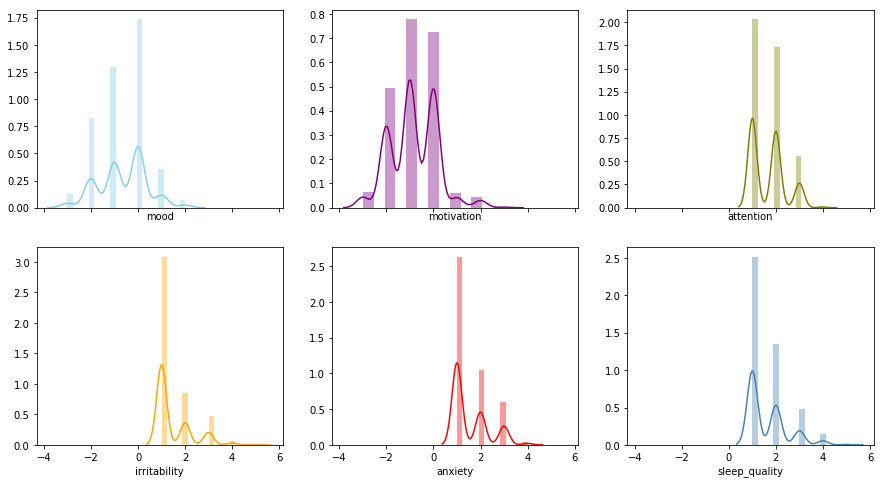

In [96]:
f, axes = plt.subplots(2, 3, figsize=(15, 8), sharex=True)
sns.distplot(interviews_plot['mood'], color="skyblue", ax=axes[0, 0])
sns.distplot(interviews_plot['motivation'], color="purple", ax=axes[0, 1])
sns.distplot(interviews_plot['attention'], color="olive", ax=axes[0, 2])
sns.distplot(interviews_plot['irritability'], color="orange", ax=axes[1, 0])
sns.distplot(interviews_plot['anxiety'], color="red", ax=axes[1, 1])
sns_plot = sns.distplot(interviews_plot['sleep_quality'], color="steelblue", ax=axes[1, 2]);
fig = sns_plot.get_figure()
fig.savefig("histogram_interviews_2.png")

In the above plot we can see the distribution of the values properly. We can see that 'mood' and 'motivation' have more negative values, ranging from -4 to 2. The rest of the variables have more positive values, ranging from 0 to 4. The features ploted above are normally distributed (gaussian function), so it is possible that we could rescale them.

Let's plot the rest of the features:

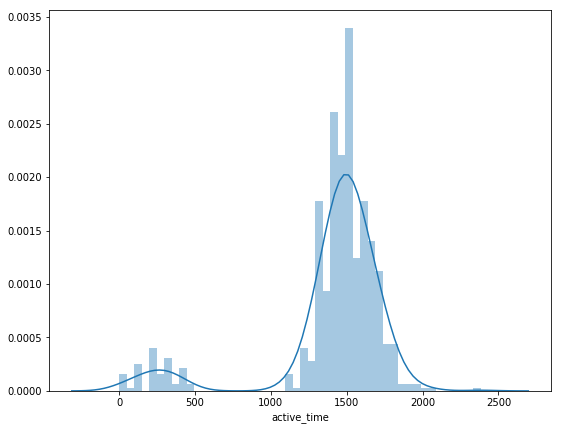

In [97]:
f, axes = plt.subplots(figsize=(9, 7))
sns_plot = sns.distplot(interviews_plot['active_time']);
fig = sns_plot.get_figure()
fig.savefig("histogram_interviews_3.png")

The above plot shows us a distribution of the daily active time time of the patients. There are two clear groups, one with less active hours, which could be from just one patient or represent certain periods of time when the patients slept a lot; and one with more active hours. We shall observe it in detail with the margin and scatter plots.

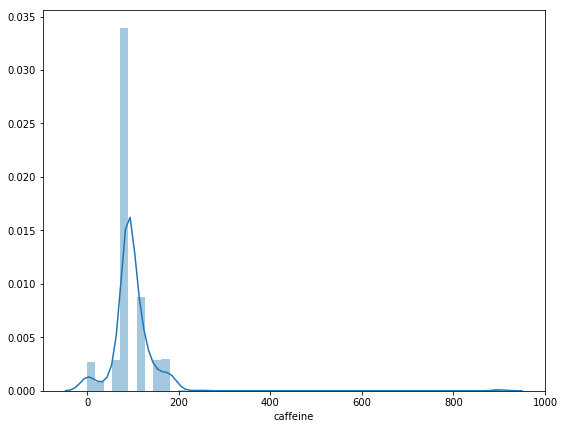

In [98]:
f, axes = plt.subplots(figsize=(9, 7))
sns_plot = sns.distplot(interviews_plot['caffeine']);
fig = sns_plot.get_figure()
fig.savefig("histogram_interviews_4.png")

It looks like there is an outlier in the caffeine values, because there is a slight column between 800 and 1000, which has to be an error when the psychiatrist was writing down the values. We check it to make sure there aren't any values above 300, which seems to be where the distribution curve goes down.

In [99]:
print interviews_plot[interviews_plot.caffeine > 300]

     mood  motivation  attention  irritability  anxiety  sleep_quality  \
635     0           0          1             1        2              1   
701    -1           0          1             1        1              3   

     nr_cigarettes  caffeine  active_time  
635             23       901         1455  
701             19       903         1530  


As we suspected, there are two values above 900, which doesn't make any sense if we compare them with the rest of the data set. We change the values of the original interview data set to the same as the ones before and after these two rows, because outliers might affect the prediction with such a small amount of that as we have.

In [100]:
print "First outlier (635):"
print interviews.at[634, 'caffeine']
print interviews.at[636, 'caffeine']
print "Second outlier (701):"
print interviews.at[700, 'caffeine']
print interviews.at[702, 'caffeine']

First outlier (635):
90
90
Second outlier (701):
90
90


The values are 90, so we change the values of the outliers to that value:

In [101]:
interviews = interviews.set_value(635, 'caffeine', 90)
interviews = interviews.set_value(701, 'caffeine', 90)

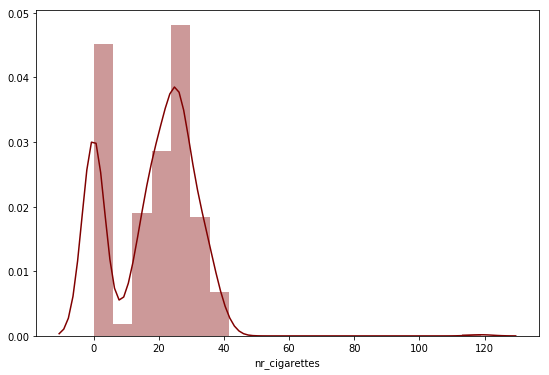

In [102]:
f, axes = plt.subplots(figsize=(9, 6))
sns_plot = sns.distplot(interviews_plot['nr_cigarettes'], color="maroon");
fig = sns_plot.get_figure()
fig.savefig("histogram_interviews_5.png")

With the above plot we can see that the number of cigarettes smoked daily by the patients are distributed between 0 and 40.

In [103]:
print interviews_plot[interviews_plot.nr_cigarettes > 40]

     mood  motivation  attention  irritability  anxiety  sleep_quality  \
545    -2          -2          2             1        2              1   

     nr_cigarettes  caffeine  active_time  
545            119        90         1215  


In [104]:
print "Outlier (545):"
print interviews.at[544, 'nr_cigarettes']
print interviews.at[546, 'nr_cigarettes']

Outlier (545):
13
12


In [105]:
interviews = interviews.set_value(545, 'caffeine', 12)

Let's try rescaling the features with a standard scaler, which assumes that the data is normally distributed:

In [106]:
from sklearn import preprocessing
np.random.seed(1)
standard_scaler = preprocessing.StandardScaler()
standard_scaled_df = standard_scaler.fit_transform(interviews_plot)
standard_scaled_df = pd.DataFrame(standard_scaled_df, columns=['mood', 'motivation', 'attention', 'irritability', 
 'anxiety', 'sleep_quality', 'nr_cigarettes', 
 'caffeine', 'active_time'])

In [107]:
standard_scaled_df.head()

,mood,motivation,attention,irritability,anxiety,sleep_quality,nr_cigarettes,caffeine,active_time
0,0.625926,1.861051,-0.944435,-0.602530,-0.720195,0.465744,-1.403456,-0.155974,0.166215
1,-0.357021,-0.171185,0.473313,-0.602530,-0.720195,1.685731,0.465732,0.368262,1.010152
2,0.625926,-0.171185,0.473313,-0.602530,-0.720195,-0.754242,0.465732,-0.155974,0.364013
3,2.591819,2.877169,1.891062,2.040433,1.882968,1.685731,1.244560,0.892497,0.799168
4,2.591819,2.877169,1.891062,2.040433,1.882968,1.685731,1.556092,0.892497,0.957406


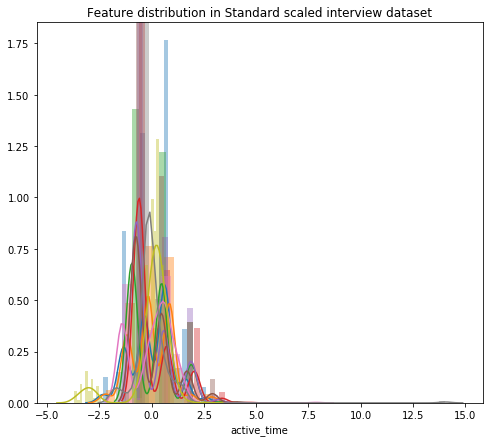

In [108]:
f, axes = plt.subplots(figsize=(8, 7))
sns.distplot(standard_scaled_df['mood'])
sns.distplot(standard_scaled_df['motivation'])
sns.distplot(standard_scaled_df['attention'])
sns.distplot(standard_scaled_df['irritability'])
sns.distplot(standard_scaled_df['anxiety'])
sns.distplot(standard_scaled_df['sleep_quality'])
sns.distplot(standard_scaled_df['nr_cigarettes'])
sns.distplot(standard_scaled_df['caffeine'])
sns_plot = sns.distplot(standard_scaled_df['active_time'])
plt.title('Feature distribution in Standard scaled interview dataset');
fig = sns_plot.get_figure()
fig.savefig("histogram_interviews_6.png")

This scaling doesn't really look like it could give us any advantage. This could be because 'nr_cigarettes' and 'active_time' are not normally distributed.

In [109]:
from sklearn import preprocessing
np.random.seed(1)
scaler = preprocessing.MinMaxScaler()
minmax_scaled_df = scaler.fit_transform(interviews_plot)
minmax_scaled_df = pd.DataFrame(minmax_scaled_df, columns=['mood', 'motivation', 'attention', 'irritability', 
 'anxiety', 'sleep_quality', 'nr_cigarettes', 
 'caffeine', 'active_time'])

In [110]:
minmax_scaled_df.head()

,mood,motivation,attention,irritability,anxiety,sleep_quality,nr_cigarettes,caffeine,active_time
0,0.6,0.666667,0.000000,0.0,0.000000,0.25,0.000000,0.099668,0.616352
1,0.4,0.333333,0.333333,0.0,0.000000,0.50,0.201681,0.132890,0.750524
2,0.6,0.333333,0.333333,0.0,0.000000,0.00,0.201681,0.099668,0.647799
3,1.0,0.833333,0.666667,0.5,0.666667,0.50,0.285714,0.166113,0.716981
4,1.0,0.833333,0.666667,0.5,0.666667,0.50,0.319328,0.166113,0.742138


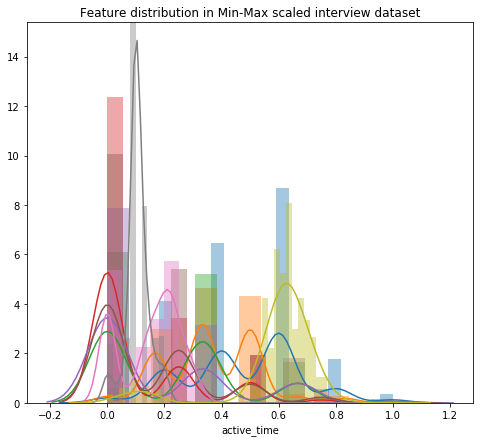

In [111]:
f, axes = plt.subplots(figsize=(8, 7))
sns.distplot(minmax_scaled_df['mood'])
sns.distplot(minmax_scaled_df['motivation'])
sns.distplot(minmax_scaled_df['attention'])
sns.distplot(minmax_scaled_df['irritability'])
sns.distplot(minmax_scaled_df['anxiety'])
sns.distplot(minmax_scaled_df['sleep_quality'])
sns.distplot(minmax_scaled_df['nr_cigarettes'])
sns.distplot(minmax_scaled_df['caffeine'])
sns_plot = sns.distplot(minmax_scaled_df['active_time'])
plt.title('Feature distribution in Min-Max scaled interview dataset');
fig = sns_plot.get_figure()
fig.savefig("histogram_interviews_7.png")

This scale looks like it is much better than the Standardized values, because the values are more similar.

#### Heatmaps

Heatmaps let us see the correlation combinations between different values in a dataset with a colour scale that represents a higher or lower correlation.

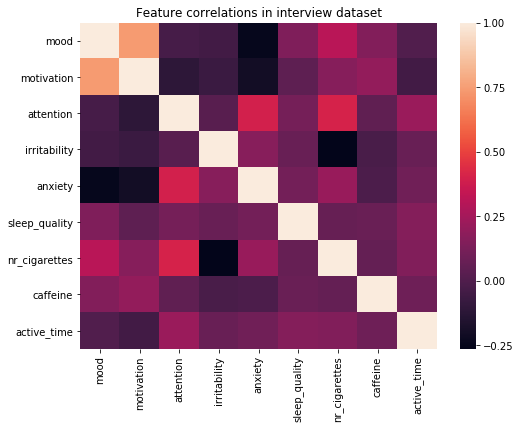

In [112]:
f, axes = plt.subplots(figsize=(8, 6))
corr = interviews_plot.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.title('Feature correlations in interview dataset');

The variables that seem to be highly correlated are 'mood' and 'motivation'. We will plot them later to check if they have a clear relationship.

#### Scatterplots

Scatterplots are very useful for studying the relationship between different variables. We are going to plot a matrix with all the variables so we can see if any relation needs a closer look.

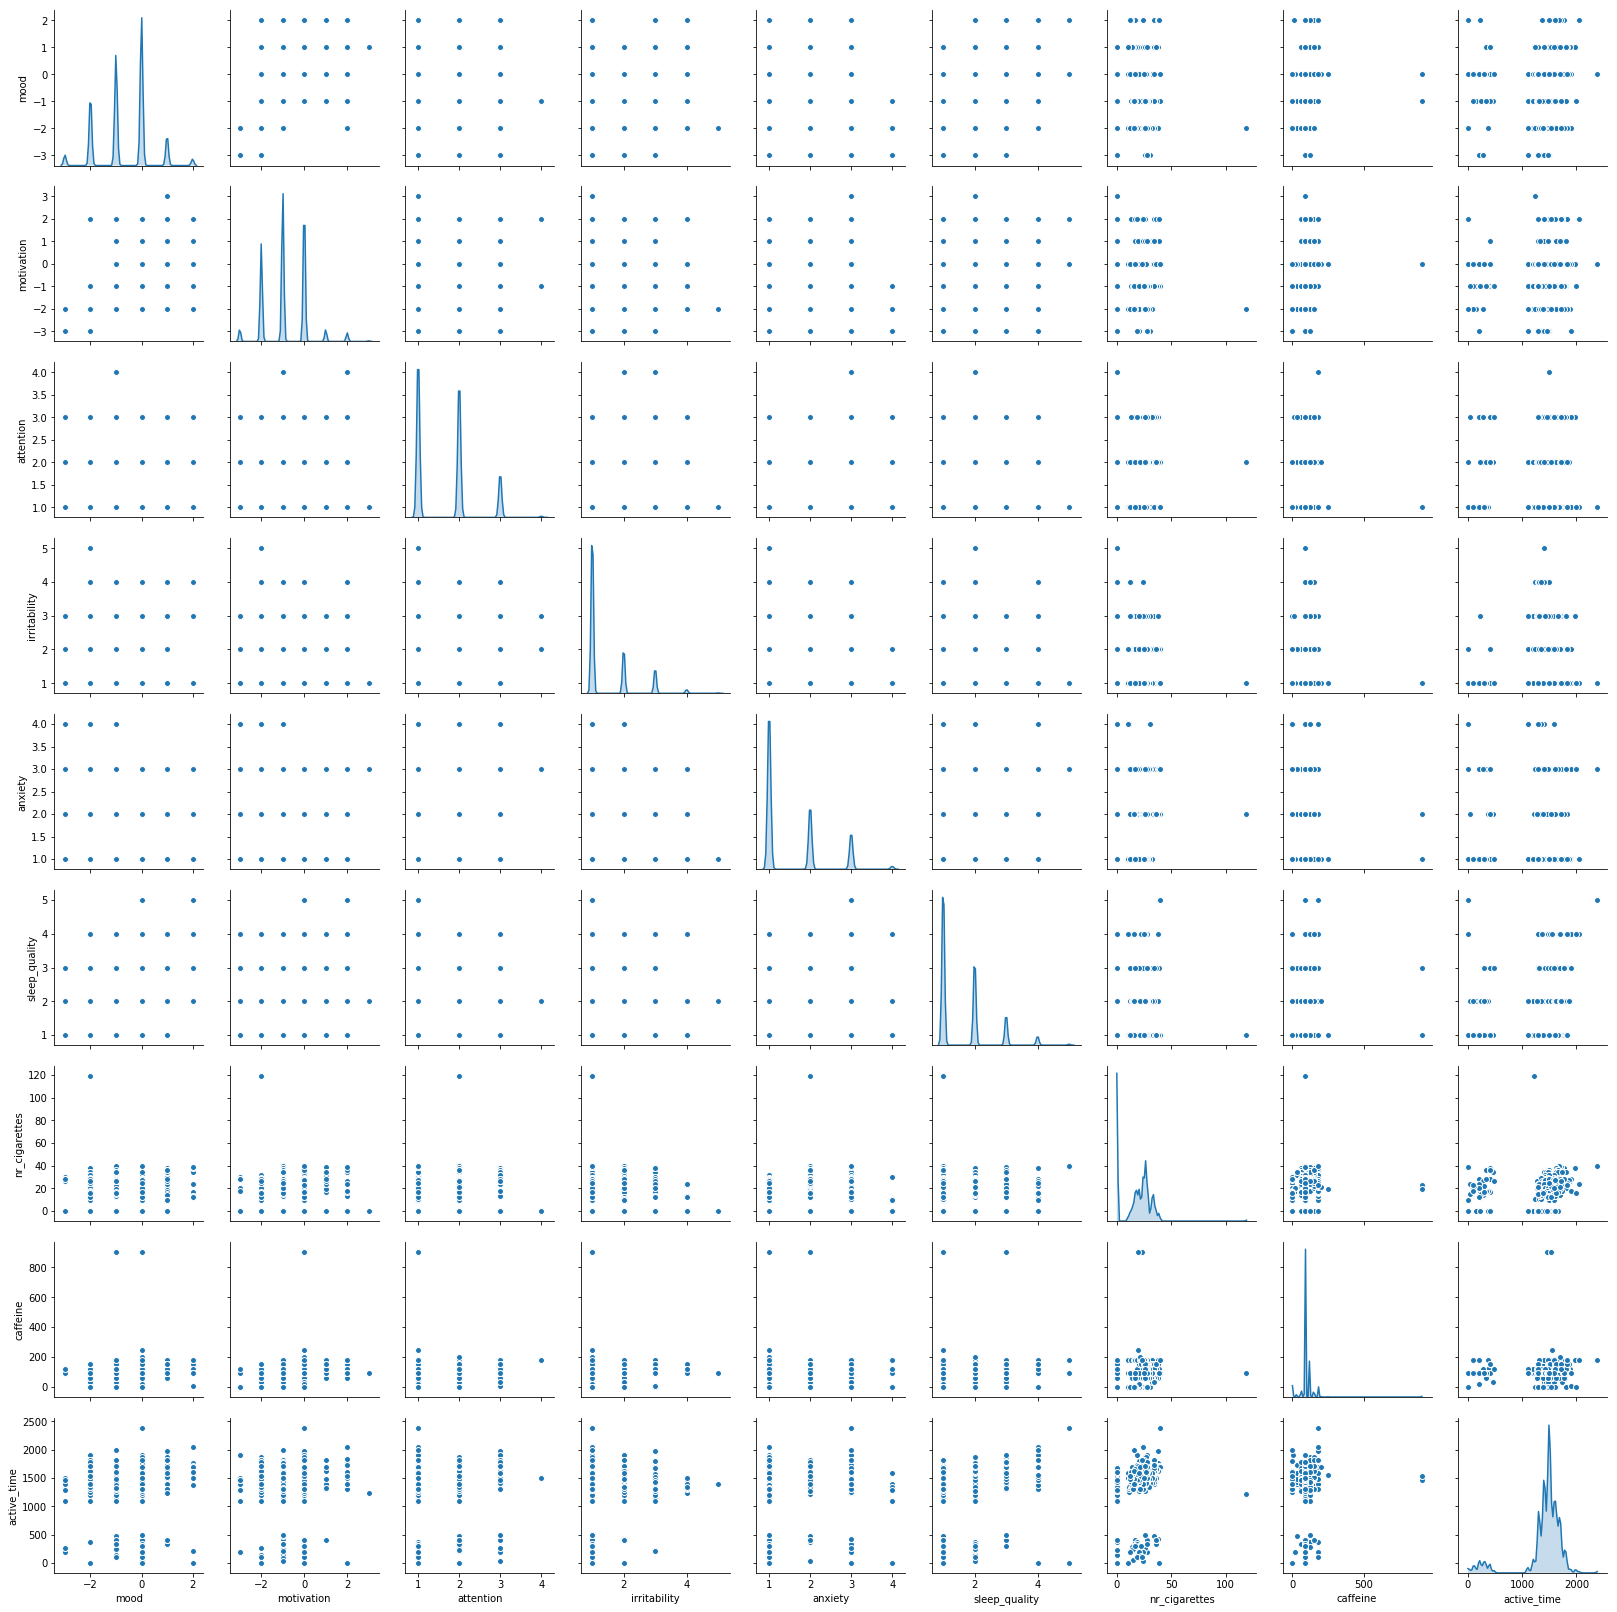

In [113]:
sns_plot = sns.pairplot(interviews_plot, diag_kind="kde", diag_kws=dict(shade=True, bw=.05, vertical=False));
sns_plot.savefig("scatterplot_interviews.png")

There is a linear relationship between 'mood' and 'motivation', just as we saw with the heatmap above. We can also observe a relationship between 'caffeine' and 'motivation'. Another interesting relationship is the one between 'anxiety' and 'sleep_quality'. There are relationships that I don't consider relevant, like the one 'active_time' has with 'caffeine' or 'nr_cigarettes', because it is quite obvious that the more a patient stays awake, the more caffeine he or she will ingest and the more cigarettes he or she will smoke.

We proceed to plot a marginal plot of Mood and Motivation:

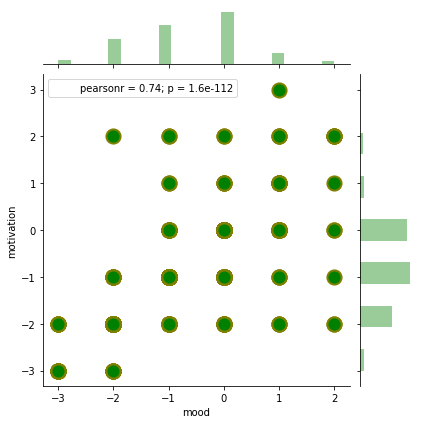

In [114]:
sns_plot = sns.jointplot(x=interviews_plot["mood"], y=interviews_plot["motivation"], kind='scatter',
              s=200, color='g', edgecolor="olive", linewidth=2);
sns_plot.savefig("marginal_interviews_1.png")

Let's make a 2D density plot to visualize the relationship:

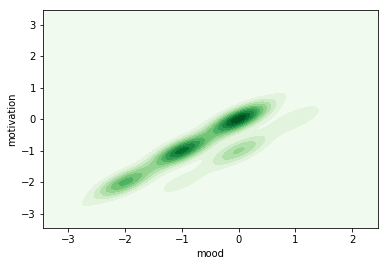

In [115]:
sns_plot = sns.kdeplot(interviews_plot.mood, interviews_plot.motivation, cmap="Greens", shade=True, bw=.15);
fig = sns_plot.get_figure()
fig.savefig("density_interviews_1.png")

There is a linear relationship between these two variables, as seen in the plots above, so we can confirm what we mentioned after plotting the heatmap. Later, we can use methods like Principal Component Analysis (PCA) to decorrelate the variables.

### Intervention data set

First of all, like we did with the other data sets, we drop the patient code and date columns:

In [116]:
interventions_plot = interventions.drop("date", 1)
interventions_plot = interventions_plot.drop("code", 1)

We also want to know which columns have more than one value so that they can be plotted:

In [117]:
interventions_plot.columns

Index([u'gaf', u'relief'], dtype='object')

Using the function created above, we can check which variables are worth to plot and which can be dropped for this part:

In [118]:
get_plottable_columns(interventions_plot)

gaf :  Yes,  9  values
relief :  Yes,  7  values


Both variables can be plotted, so we plot a histogram to check how they are distributed:

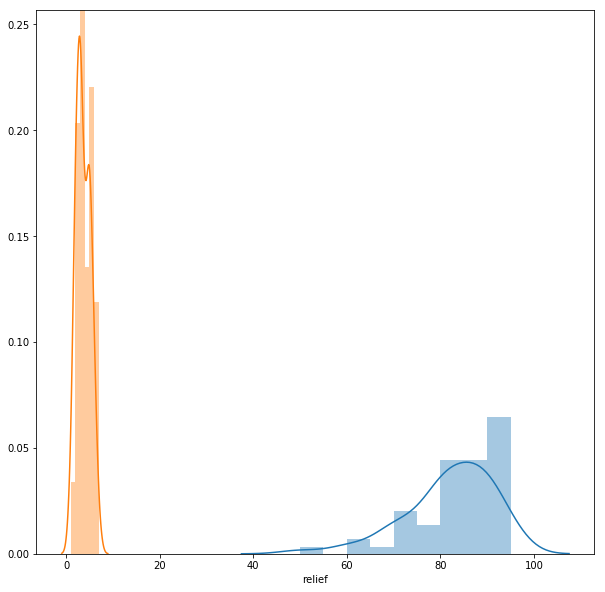

In [119]:
f, axes = plt.subplots(figsize=(10, 10))
sns.distplot(interventions_plot['gaf'])
sns_plot = sns.distplot(interventions_plot['relief']);
fig = sns_plot.get_figure()
fig.savefig("histogram_interventions_1.png")

As we can see, both features are not really in the same scale, there is a huge disparity in the distribution. This is important to know so that we can rescale the data when combining the data sets.

Let's use a Standard scaler to scale the data:

In [120]:
from sklearn import preprocessing
np.random.seed(1)
standard_scaler = preprocessing.StandardScaler()
standard_scaled_intervention_df = standard_scaler.fit_transform(interventions_plot)
standard_scaled_intervention_df = pd.DataFrame(standard_scaled_intervention_df, columns=['gaf', 'relief'])

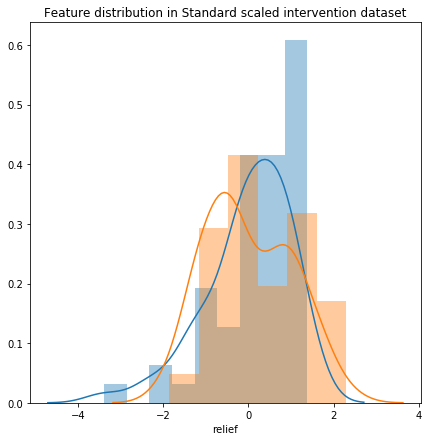

In [121]:
f, axes = plt.subplots(figsize=(7, 7))
sns.distplot(standard_scaled_intervention_df['gaf'])
sns_plot = sns.distplot(standard_scaled_intervention_df['relief'])
plt.title('Feature distribution in Standard scaled intervention dataset');
fig = sns_plot.get_figure()
fig.savefig("histogram_interventions_2.png")

This scale is something we could work with later on. We shall se how the prediction accuracies vary.

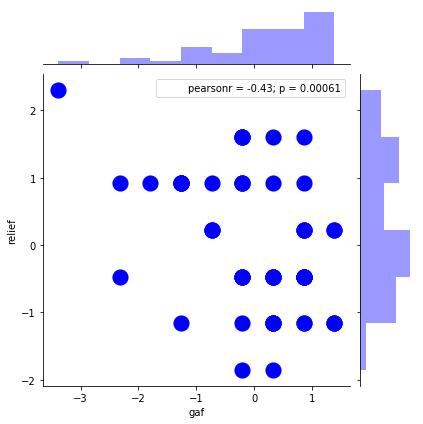

In [122]:
sns_plot = sns.jointplot(x=standard_scaled_intervention_df["gaf"], y=standard_scaled_intervention_df["relief"], kind='scatter',
              s=200, color='b', edgecolor="blue", linewidth=2);
sns_plot.savefig("marginal_interventions_1.png")

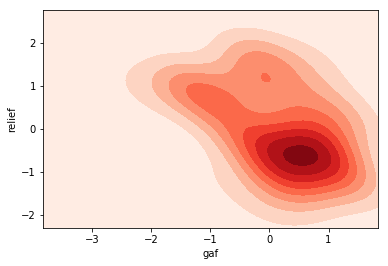

In [123]:
sns_plot = sns.kdeplot(standard_scaled_intervention_df.gaf, standard_scaled_intervention_df.relief, cmap="Reds", shade=True, bw=.15);
fig = sns_plot.get_figure()
fig.savefig("density_interventions_1.png")

## Combining the data sets

The next part of the project is to try different combinations of the data sets to try getting the best accuracies later. For this, we create some functions that combine the different data sets based on the date of the entries, in order to get the state the patient was in on each of them, which is the value we will try to predict.

### YMRS and Episode data sets

Let's try combining the YMRS data set with the Episode data set.

In [124]:
young.head()

,code,date,euphoria,hyperactivity,sexual_impulse,sleep,irritability,verbal_expression,language,thought,aggressiveness,appearance,illness_awareness
9,G,2017-06-06 00:00:00,0,1,0,0,2,2,0,0,0,0,0
10,G,2017-06-16 00:00:00,0,0,0,0,0,2,0,0,0,0,0
23,M,2017-06-21 00:00:00,0,1,0,0,0,2,0,0,2,0,0
22,M,2017-06-21 00:00:00,0,1,0,0,0,2,0,0,2,0,0
0,D,2017-06-26 00:00:00,1,1,0,0,0,2,0,0,0,0,0


We define a function that combines these two datasets based on the date. This function iterates over a data set and compares it with the mania and depression episodes defined in the Episode data set. I have assumed that if the dates from the entries of the data set are not included in the episode intervals from the Episode dataset, the patient was in a normal state. This way we get three possible states a patient can be in (Depression->'D', Mania->'M' and Normal->'N').

In [125]:
def checkEpisode(date, patient):
    episode = 'N'
    ep = episodes.loc[episodes['patient'] == patient]
    for index, row in ep.iterrows():
        if date >= row.start and date < row.end:
            episode = row.episode
    return episode

In [126]:
young_episodes = young.copy()
for index, row in young_episodes.iterrows():
    young_episodes.at[index, 'episode'] = checkEpisode(row.date, row.code)

After having merged the data sets, we can drop the 'date' and 'code' columns, because they do not give any information useful for the prediction:

In [127]:
young_episodes = young_episodes.drop('code', 1)
young_episodes = young_episodes.drop('date', 1)

In [128]:
young_episodes.head()

,euphoria,hyperactivity,sexual_impulse,sleep,irritability,verbal_expression,language,thought,aggressiveness,appearance,illness_awareness,episode
9,0,1,0,0,2,2,0,0,0,0,0,N
10,0,0,0,0,0,2,0,0,0,0,0,N
23,0,1,0,0,0,2,0,0,2,0,0,M
22,0,1,0,0,0,2,0,0,2,0,0,M
0,1,1,0,0,0,2,0,0,0,0,0,N


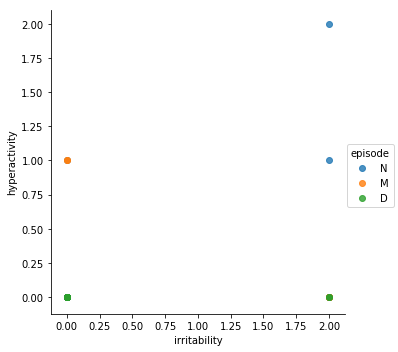

In [334]:
sns_plot = sns.lmplot( x="irritability", y="hyperactivity", data=young_episodes, fit_reg=False, hue='episode');
sns_plot.savefig("ymrs_merged_1.png")

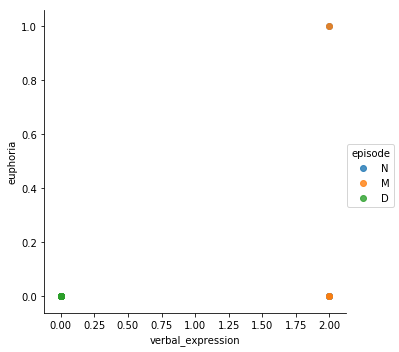

In [337]:
sns_plot = sns.lmplot( x="verbal_expression", y="euphoria", data=young_episodes, fit_reg=False, hue='episode');
sns_plot.savefig("ymrs_merged_2.png")

These plots do not give any clear view of how the episodes are distributed in the YMRS dataset.

### HDRS and Episode data sets

In [131]:
hamilton.head()

,code,date,depressed_mood,guilt,suicide,precocious_insomnia,medium_insomnia,verbal_expression,language,thought,...,retardation,agitation,psychic_anxiety,somatic_anxiety,somatic_gastrointestinal_symptoms,somatic_general_symptoms,genital_symptoms,hypochondria,weight_loss,illness_awareness
10,G,2017-06-06 00:00:00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,G,2017-06-16 00:00:00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36,M,2017-06-21 00:00:00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38,M,2017-06-21 00:00:00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,D,2017-06-26 00:00:00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [132]:
hamilton_episodes = hamilton.copy()
for index, row in hamilton_episodes.iterrows():
    hamilton_episodes.at[index, 'episode'] = checkEpisode(row.date, row.code)

After having merged the data sets, we can drop the 'date' and 'code' columns, because they do not give any information useful for the prediction:

In [133]:
hamilton_episodes = hamilton_episodes.drop('code', 1)
hamilton_episodes = hamilton_episodes.drop('date', 1)

In [134]:
hamilton_episodes.head()

,depressed_mood,guilt,suicide,precocious_insomnia,medium_insomnia,verbal_expression,language,thought,late_insomnia,work,...,agitation,psychic_anxiety,somatic_anxiety,somatic_gastrointestinal_symptoms,somatic_general_symptoms,genital_symptoms,hypochondria,weight_loss,illness_awareness,episode
10,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,N
11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,N
36,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,M
38,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,M
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,N


We proceed to make some plots to see how some of the plots from the previous part are distributed with different states:

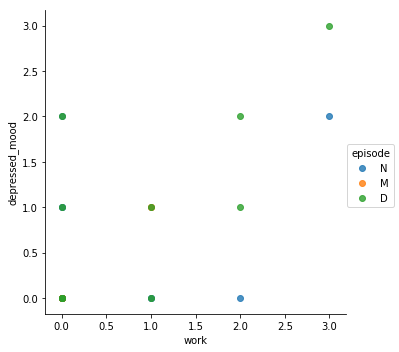

In [338]:
sns_plot = sns.lmplot( x="work", y="depressed_mood", data=hamilton_episodes, fit_reg=False, hue='episode');
sns_plot.savefig("hdrs_merged_1.png")

Even though we only see the last painted points in the plot, we can clearly see that when the patients were having depression episodes, they had a much higher value of the "Depressed Mood" rating item, between 2 and 3, which means that they either spontaneusly reported feeling depressed or they communicated feeling depressed non-verbally. 

We can also see that when the patients are depressed, they start feeling loss of interest in activities they do or there is a decrease in the time spent on work and activities.

We proceed to plot the rest of the variables that we found out had a correlation when we visualized the data:

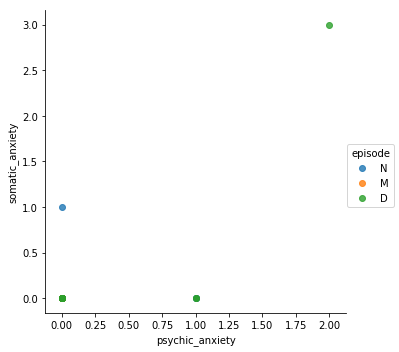

In [340]:
sns_plot = sns.lmplot( x="psychic_anxiety", y="somatic_anxiety", data=hamilton_episodes, fit_reg=False, hue='episode');
sns_plot.savefig("hdrs_merged_2.png")

There aren't enough points to observe a distinction between the states, but we can see that when the patient was depressed, the value of the "Depressed Mood" rating item was very high and the one of "Psychic Anxiety" too.

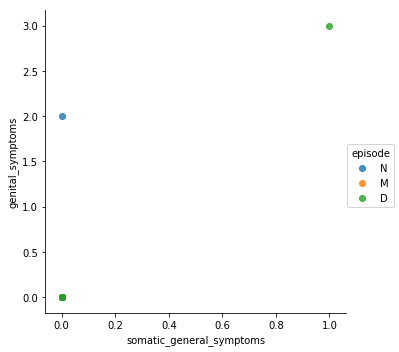

In [137]:
sns.lmplot( x="somatic_general_symptoms", y="genital_symptoms", data=hamilton_episodes, fit_reg=False, hue='episode');

The same thing can be said with these two variables. It is not a coincidence that there is a clear distinction between when the patient was depressed and in a normal state.

### Interview and Episode data sets

In [138]:
interviews.head()

,mood,motivation,attention,irritability,anxiety,sleep_quality,nr_cigarettes,caffeine,alcohol,other_drugs,patient,date,active_time
274,0,1,1,1,1,2,0,90,0,0,G,2007-07-17 00:00:00,1470
230,-1,-1,2,1,1,3,24,120,0,0,D,2017-01-02 00:00:00,1790
241,0,-1,2,1,1,1,24,90,0,0,D,2017-01-15 00:00:00,1545
0,2,2,3,3,3,3,34,150,0,0,D,2017-06-01 00:00:00,1710
1,2,2,3,3,3,3,38,150,0,0,D,2017-06-02 00:00:00,1770


In [139]:
interviews_episodes = interviews.copy()
for index, row in interviews_episodes.iterrows():
    interviews_episodes.at[index, 'episode'] = checkEpisode(row.date, row.patient)

After having merged the data sets, we can drop the 'date' and 'patient' columns, because they do not give any information useful for the prediction:

In [140]:
interviews_episodes = interviews_episodes.drop('patient', 1)
interviews_episodes = interviews_episodes.drop('date', 1)

In [141]:
interviews_episodes.head()

,mood,motivation,attention,irritability,anxiety,sleep_quality,nr_cigarettes,caffeine,alcohol,other_drugs,active_time,episode
274,0,1,1,1,1,2,0,90,0,0,1470,N
230,-1,-1,2,1,1,3,24,120,0,0,1790,N
241,0,-1,2,1,1,1,24,90,0,0,1545,N
0,2,2,3,3,3,3,34,150,0,0,1710,N
1,2,2,3,3,3,3,38,150,0,0,1770,N


We proceed to make some plots to see how some of the plots from the previous part are distributed with different states:

In [142]:
interviews_episodes = interviews_episodes.drop("alcohol", 1)
interviews_episodes = interviews_episodes.drop("other_drugs", 1)

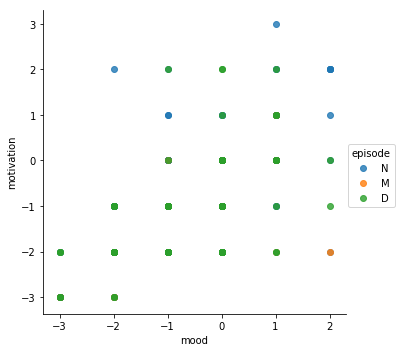

In [371]:
sns_plot = sns.lmplot( x="mood", y="motivation", data=interviews_episodes, fit_reg=False, hue='episode');
sns_plot.savefig("interviews_merged_1.png")

We can observe that there are more points where the patient had a depression episode in the negative part of the axes (-3,0). Let's try plotting some other variables.

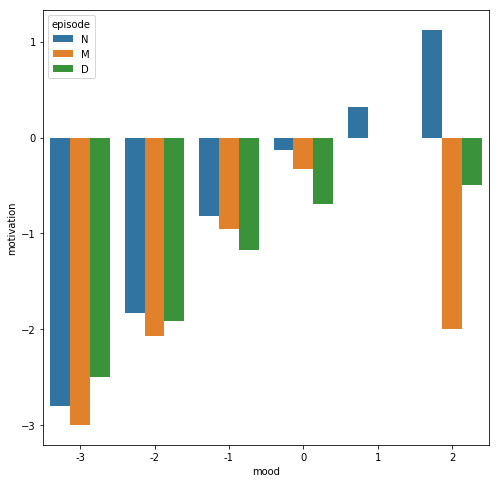

In [383]:
f, ax = plt.subplots(figsize=(8, 8))
g = sns.barplot(data=interviews_episodes, x='mood', y='motivation',
                hue='episode', ci=None)
fig = g.get_figure()
fig.savefig("interviews_merged_2.png")

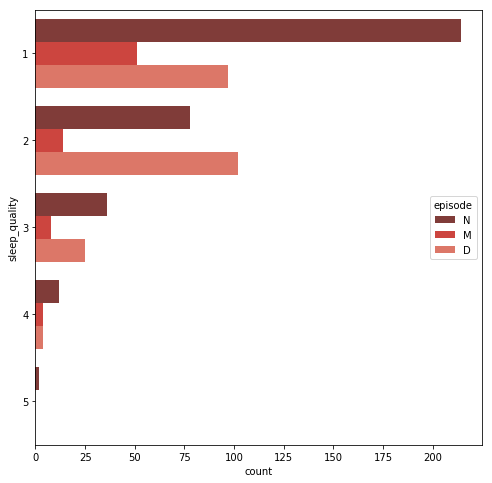

In [362]:
f, ax = plt.subplots(figsize=(8, 8))
sns.countplot(y="sleep_quality", hue="episode", data=interviews_episodes, palette="Reds_d");

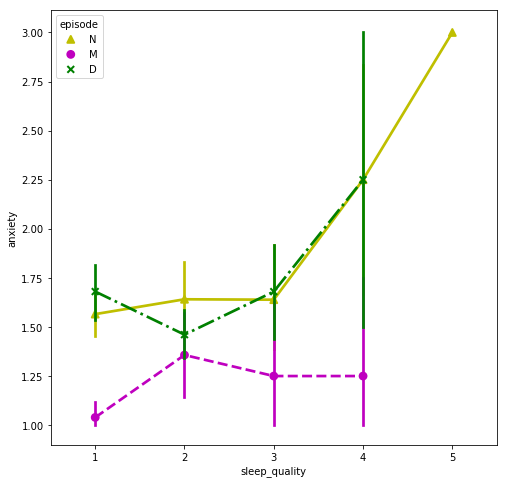

In [372]:
f, ax = plt.subplots(figsize=(8, 8))
sns.pointplot(x="sleep_quality", y="anxiety", hue="episode", data=interviews_episodes,
              palette={"D": "g", "M": "m", "N": "y"},
              markers=["^", "o", "x"], linestyles=["-", "--", "-."]);

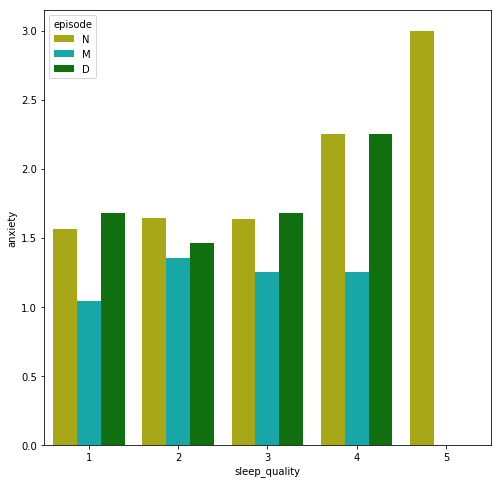

In [381]:
f, ax = plt.subplots(figsize=(8, 8))
g = sns.barplot(data=interviews_episodes, x='sleep_quality', y='anxiety',
                hue='episode', palette={"D": "g", "M": "c", "N": "y"}, ci=None)
fig = g.get_figure()
fig.savefig("interviews_merged_3.png")

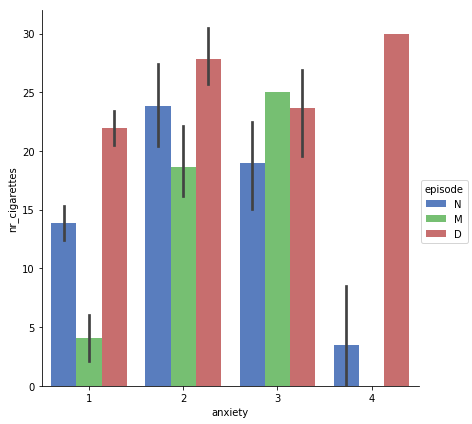

In [385]:
g = sns.factorplot(x="anxiety", y="nr_cigarettes", hue="episode", data=interviews_episodes,
                   size=6, kind="bar", palette="muted")

We can see that when the patients were in a "normal" state, the sleep quality was always quite good, and they had a good mood except some of the points.

### Intervention and Episode data sets

In [145]:
interventions.head()

,code,date,gaf,relief
0,D,2017-06-01 00:00:00,80,5
1,D,2017-06-01 00:00:00,80,5
20,G,2017-06-06 00:00:00,80,1
68,M,2017-06-07 00:00:00,60,3
21,G,2017-06-12 00:00:00,70,5


In [146]:
interventions_episodes = interventions.copy()
for index, row in interventions_episodes.iterrows():
    interventions_episodes.at[index, 'episode'] = checkEpisode(row.date, row.code)

After having merged the data sets, we can drop the 'date' and 'code' columns, because they do not give any information useful for the prediction:

In [147]:
interventions_episodes = interventions_episodes.drop('code', 1)
interventions_episodes = interventions_episodes.drop('date', 1)

In [148]:
interventions_episodes.head()

,gaf,relief,episode
0,80,5,N
1,80,5,N
20,80,1,N
68,60,3,M
21,70,5,N


We proceed to plot the relationship between the variables in different episodes:

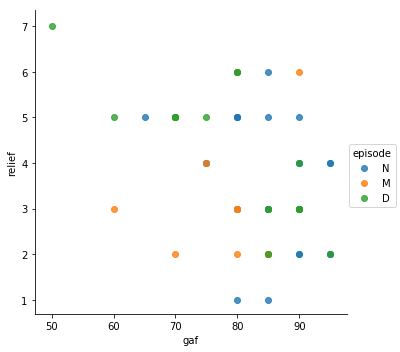

In [149]:
sns.lmplot( x="gaf", y="relief", data=interventions_episodes, fit_reg=False, hue='episode');

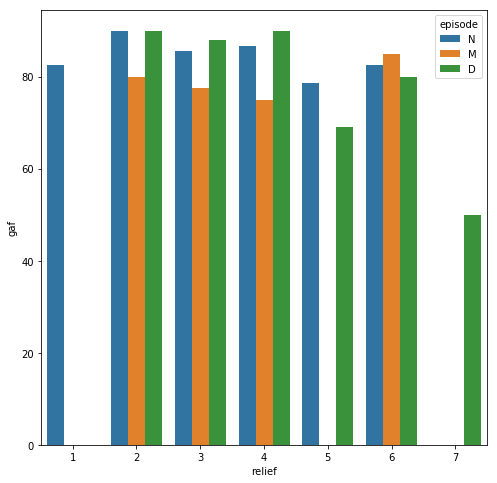

In [388]:
f, ax = plt.subplots(figsize=(8, 8))
g = sns.barplot(data=interventions_episodes, x='relief', y='gaf',
                hue='episode', ci=None)
fig = g.get_figure()
fig.savefig("interventions_merged_1.png")

We can't see a clear distribution of the different states.

### Combining all the data sets

The goal is to combine all the data sets by date to get a data set with many features, in order to later check if the prediction accuracy is higher than the rest of data sets. We will see, after making different combinations of the data sets, if they have enough entries to test the algorithms. The combined data sets that have enough entries will be tested later.

In [150]:
print "Number of rows in HDRS dataframe:", len(hamilton.index)
print "Number of rows in YDRS dataframe:", len(young.index)
print "Number of rows in interview dataframe:", len(interviews.index)
print "Number of rows in intervention dataframe:", len(interventions.index)

Number of rows in HDRS dataframe: 36
Number of rows in YDRS dataframe: 35
Number of rows in interview dataframe: 647
Number of rows in intervention dataframe: 59


The data frame with less rows is the YMRS data frame. Let's iterate over it and combine it with the other three.

In [151]:
ymrs_hdrs = young.copy()

The following function returns the index of a row if the given date exists in the data frame

In [152]:
def date_in_df(date, df):
    n = None
    for index, row in df.iterrows():
        if date == row.date:
            n = index
    return n

First, we have to initalize the columns of the combined data frame with the same names as the hamilton data frame:

In [153]:
for column in hamilton.columns:
    if(column != 'code' and column != 'date'):
        ymrs_hdrs[column] = np.nan

With the following snippet we combine the data sets:

In [154]:
for index, row in ymrs_hdrs.iterrows():
    n = date_in_df(row.date, hamilton)
    if n != None and hamilton['code'][n] == row.code:
        for column in hamilton.columns:
            if(column != 'code' and column != 'date'):
                ymrs_hdrs[column][index] = hamilton[column][n]

Let's check if the data sets were correctly combined:

In [155]:
ymrs_hdrs.columns

Index([u'code', u'date', u'euphoria', u'hyperactivity', u'sexual_impulse',
       u'sleep', u'irritability', u'verbal_expression', u'language',
       u'thought', u'aggressiveness', u'appearance', u'illness_awareness',
       u'depressed_mood', u'guilt', u'suicide', u'precocious_insomnia',
       u'medium_insomnia', u'late_insomnia', u'work', u'retardation',
       u'agitation', u'psychic_anxiety', u'somatic_anxiety',
       u'somatic_gastrointestinal_symptoms', u'somatic_general_symptoms',
       u'genital_symptoms', u'hypochondria', u'weight_loss'],
      dtype='object')

In [156]:
ymrs_hdrs.dropna(inplace=True)

In [157]:
print "Length of the combined data set (YMRS and HDRS): ", len(ymrs_hdrs)

Length of the combined data set (YMRS and HDRS):  25


Now, we do the same for with the interview data set. We need to rename some columns because they have the same name in both data sets:

In [158]:
interviews.columns

Index([u'mood', u'motivation', u'attention', u'irritability', u'anxiety',
       u'sleep_quality', u'nr_cigarettes', u'caffeine', u'alcohol',
       u'other_drugs', u'patient', u'date', u'active_time'],
      dtype='object')

In [159]:
def rename_columns(df1, df2, column_code):
    for column in df1.columns:
        if column in df2.columns and column != 'code' and column != 'date':
            col_name_1 = column + "_" + column_code
            df1.rename(columns = {column: col_name_1}, inplace = True)

In [160]:
rename_columns(ymrs_hdrs, interviews, "ymrs")

In [161]:
ymrs_hdrs.columns

Index([u'code', u'date', u'euphoria', u'hyperactivity', u'sexual_impulse',
       u'sleep', u'irritability_ymrs', u'verbal_expression', u'language',
       u'thought', u'aggressiveness', u'appearance', u'illness_awareness',
       u'depressed_mood', u'guilt', u'suicide', u'precocious_insomnia',
       u'medium_insomnia', u'late_insomnia', u'work', u'retardation',
       u'agitation', u'psychic_anxiety', u'somatic_anxiety',
       u'somatic_gastrointestinal_symptoms', u'somatic_general_symptoms',
       u'genital_symptoms', u'hypochondria', u'weight_loss'],
      dtype='object')

In [162]:
ymrs_hdrs_interviews = ymrs_hdrs.copy()
for column in interviews.columns:
    if(column != 'code' and column != 'date'):
        ymrs_hdrs_interviews[column] = np.nan

With the following snippet we combine the data set with the interview data set:

In [163]:
for index, row in ymrs_hdrs_interviews.iterrows():
    n = date_in_df(row.date, interviews)
    if n != None and interviews['patient'][n] == row.code:
        for column in interviews.columns:
            if(column != 'patient' and column != 'date'):
                ymrs_hdrs_interviews[column][index] = interviews[column][n]

In [164]:
ymrs_hdrs_interviews = ymrs_hdrs_interviews.drop("patient", 1)

In [165]:
ymrs_hdrs_interviews.columns

Index([u'code', u'date', u'euphoria', u'hyperactivity', u'sexual_impulse',
       u'sleep', u'irritability_ymrs', u'verbal_expression', u'language',
       u'thought', u'aggressiveness', u'appearance', u'illness_awareness',
       u'depressed_mood', u'guilt', u'suicide', u'precocious_insomnia',
       u'medium_insomnia', u'late_insomnia', u'work', u'retardation',
       u'agitation', u'psychic_anxiety', u'somatic_anxiety',
       u'somatic_gastrointestinal_symptoms', u'somatic_general_symptoms',
       u'genital_symptoms', u'hypochondria', u'weight_loss', u'mood',
       u'motivation', u'attention', u'irritability', u'anxiety',
       u'sleep_quality', u'nr_cigarettes', u'caffeine', u'alcohol',
       u'other_drugs', u'active_time'],
      dtype='object')

In [166]:
ymrs_hdrs_interviews.dropna(inplace=True)

In [167]:
print "Length of the combined data set (YMRS, HDRS and interviews): ", len(ymrs_hdrs_interviews)

Length of the combined data set (YMRS, HDRS and interviews):  5


This leaves us with a data set of 5 entries which is not enough for testing the Machine Learning algorithms. We will not combine it with the Intervention data set, because it will have at best 5 rows.

Nowing this, we take the combined data set of YMRS and HDRS and proceed to drop the columns that only have one value and combine the data set with the episode data set:

In [168]:
get_plottable_columns(ymrs_hdrs)

code :  Yes,  3  values
date :  Yes,  24  values
euphoria :  Yes,  2  values
hyperactivity :  Yes,  2  values
sexual_impulse :  No, 1 value
sleep :  No, 1 value
irritability_ymrs :  Yes,  2  values
verbal_expression :  No, 1 value
language :  No, 1 value
thought :  No, 1 value
aggressiveness :  Yes,  2  values
appearance :  No, 1 value
illness_awareness :  No, 1 value
depressed_mood :  Yes,  3  values
guilt :  Yes,  3  values
suicide :  Yes,  3  values
precocious_insomnia :  Yes,  3  values
medium_insomnia :  Yes,  2  values
late_insomnia :  Yes,  2  values
work :  Yes,  4  values
retardation :  Yes,  2  values
agitation :  Yes,  2  values
psychic_anxiety :  Yes,  2  values
somatic_anxiety :  Yes,  2  values
somatic_gastrointestinal_symptoms :  No, 1 value
somatic_general_symptoms :  No, 1 value
genital_symptoms :  Yes,  2  values
hypochondria :  No, 1 value
weight_loss :  No, 1 value


In [169]:
ymrs_hdrs = ymrs_hdrs.drop("sexual_impulse", 1)
ymrs_hdrs = ymrs_hdrs.drop("sleep", 1)
ymrs_hdrs = ymrs_hdrs.drop("language", 1)
ymrs_hdrs = ymrs_hdrs.drop("thought", 1)
ymrs_hdrs = ymrs_hdrs.drop("appearance", 1)
ymrs_hdrs = ymrs_hdrs.drop("illness_awareness", 1)
ymrs_hdrs = ymrs_hdrs.drop("somatic_gastrointestinal_symptoms", 1)
ymrs_hdrs = ymrs_hdrs.drop("hypochondria", 1)
ymrs_hdrs = ymrs_hdrs.drop("weight_loss", 1)

We now proceed to check the types of the data in the data frame:

In [170]:
ymrs_hdrs.dtypes

code                         object
date                         object
euphoria                      int64
hyperactivity                 int64
irritability_ymrs             int64
verbal_expression           float64
aggressiveness                int64
depressed_mood              float64
guilt                       float64
suicide                     float64
precocious_insomnia         float64
medium_insomnia             float64
late_insomnia               float64
work                        float64
retardation                 float64
agitation                   float64
psychic_anxiety             float64
somatic_anxiety             float64
somatic_general_symptoms    float64
genital_symptoms            float64
dtype: object

We change the floating point variables to integers, so that all variables have the same value:

In [171]:
ymrs_hdrs.verbal_expression = ymrs_hdrs.verbal_expression.astype(int)
ymrs_hdrs.depressed_mood = ymrs_hdrs.depressed_mood.astype(int)
ymrs_hdrs.guilt = ymrs_hdrs.guilt.astype(int)
ymrs_hdrs.suicide = ymrs_hdrs.suicide.astype(int)
ymrs_hdrs.precocious_insomnia = ymrs_hdrs.precocious_insomnia.astype(int)
ymrs_hdrs.medium_insomnia = ymrs_hdrs.medium_insomnia.astype(int)
ymrs_hdrs.late_insomnia = ymrs_hdrs.late_insomnia.astype(int)
ymrs_hdrs.work = ymrs_hdrs.work.astype(int)
ymrs_hdrs.retardation = ymrs_hdrs.retardation.astype(int)
ymrs_hdrs.agitation = ymrs_hdrs.agitation.astype(int)
ymrs_hdrs.psychic_anxiety = ymrs_hdrs.psychic_anxiety.astype(int)
ymrs_hdrs.somatic_anxiety = ymrs_hdrs.somatic_anxiety.astype(int)
ymrs_hdrs.somatic_general_symptoms = ymrs_hdrs.somatic_general_symptoms.astype(int)
ymrs_hdrs.genital_symptoms = ymrs_hdrs.genital_symptoms.astype(int)

Now, we can combine the data set with episode intervals:

In [172]:
for index, row in ymrs_hdrs.iterrows():
    ymrs_hdrs.at[index, 'episode'] = checkEpisode(row.date, row.code)

We now proceed to drop the 'date' and 'code' columns, as we don't need them for the prediction:

In [173]:
ymrs_hdrs = ymrs_hdrs.drop("date", 1)
ymrs_hdrs = ymrs_hdrs.drop("code", 1)

We now have a data set to test the accuracy of different algorithms on:

In [174]:
ymrs_hdrs.head()

,euphoria,hyperactivity,irritability_ymrs,verbal_expression,aggressiveness,depressed_mood,guilt,suicide,precocious_insomnia,medium_insomnia,late_insomnia,work,retardation,agitation,psychic_anxiety,somatic_anxiety,somatic_general_symptoms,genital_symptoms,episode
9,0,1,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,N
10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,N
23,0,1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,M
22,0,1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,M
0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,N


Let's try combining the Interview data set with the Intervention data set:

In [175]:
interviews_interventions = interventions.copy()

First, we have to initalize the columns of the combined data set with the same names as the interview data set:

In [176]:
for column in interviews.columns:
    if(column != 'patient' and column != 'date'):
        interviews_interventions[column] = np.nan

With the following snippet we combine the data sets. We iterate over the Intervention data set because it is has fewer rows:

In [177]:
for index, row in interviews_interventions.iterrows():
    n = date_in_df(row.date, interviews)
    if n != None and interviews['patient'][n] == row.code:
        for column in interviews.columns:
            if(column != 'patient' and column != 'date'):
                interviews_interventions[column][index] = interviews[column][n]

In [178]:
interviews_interventions.head()

,code,date,gaf,relief,mood,motivation,attention,irritability,anxiety,sleep_quality,nr_cigarettes,caffeine,alcohol,other_drugs,active_time
0,D,2017-06-01 00:00:00,80,5,2.0,2.0,3.0,3.0,3.0,3.0,34.0,150.0,0.0,0.0,1710.0
1,D,2017-06-01 00:00:00,80,5,2.0,2.0,3.0,3.0,3.0,3.0,34.0,150.0,0.0,0.0,1710.0
20,G,2017-06-06 00:00:00,80,1,-1.0,-1.0,4.0,2.0,3.0,2.0,0.0,180.0,0.0,0.0,1500.0
68,M,2017-06-07 00:00:00,60,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,G,2017-06-12 00:00:00,70,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We drop the 'NaN' values, to get a data set with real data:

In [179]:
interviews_interventions.dropna(inplace=True)

In [180]:
interviews_interventions.head()

,code,date,gaf,relief,mood,motivation,attention,irritability,anxiety,sleep_quality,nr_cigarettes,caffeine,alcohol,other_drugs,active_time
0,D,2017-06-01 00:00:00,80,5,2.0,2.0,3.0,3.0,3.0,3.0,34.0,150.0,0.0,0.0,1710.0
1,D,2017-06-01 00:00:00,80,5,2.0,2.0,3.0,3.0,3.0,3.0,34.0,150.0,0.0,0.0,1710.0
20,G,2017-06-06 00:00:00,80,1,-1.0,-1.0,4.0,2.0,3.0,2.0,0.0,180.0,0.0,0.0,1500.0
3,D,2017-06-26 00:00:00,85,3,1.0,0.0,2.0,1.0,3.0,1.0,34.0,150.0,0.0,0.0,1685.0
4,D,2017-07-10 00:00:00,80,6,-2.0,-1.0,3.0,1.0,3.0,1.0,34.0,120.0,0.0,0.0,1670.0


This leaves us with a very small data set, but we can still use it as an example for testing algorithm accuracies. Now, we drop the columns with only one value and convert all the data to the same type:

In [181]:
get_plottable_columns(interviews_interventions)

code :  Yes,  3  values
date :  Yes,  13  values
gaf :  Yes,  4  values
relief :  Yes,  5  values
mood :  Yes,  5  values
motivation :  Yes,  4  values
attention :  Yes,  4  values
irritability :  Yes,  3  values
anxiety :  Yes,  4  values
sleep_quality :  Yes,  3  values
nr_cigarettes :  Yes,  5  values
caffeine :  Yes,  6  values
alcohol :  No, 1 value
other_drugs :  No, 1 value
active_time :  Yes,  13  values


In [182]:
interviews_interventions = interviews_interventions.drop("alcohol", 1)
interviews_interventions = interviews_interventions.drop("other_drugs", 1)

In [183]:
interviews_interventions.dtypes

code              object
date              object
gaf                int64
relief             int64
mood             float64
motivation       float64
attention        float64
irritability     float64
anxiety          float64
sleep_quality    float64
nr_cigarettes    float64
caffeine         float64
active_time      float64
dtype: object

We change the floating point variables to integers, so that all variables have the same value:

In [184]:
interviews_interventions.mood = interviews_interventions.mood.astype(int)
interviews_interventions.motivation = interviews_interventions.motivation.astype(int)
interviews_interventions.attention = interviews_interventions.attention.astype(int)
interviews_interventions.irritability = interviews_interventions.irritability.astype(int)
interviews_interventions.anxiety = interviews_interventions.anxiety.astype(int)
interviews_interventions.sleep_quality = interviews_interventions.sleep_quality.astype(int)
interviews_interventions.nr_cigarettes = interviews_interventions.nr_cigarettes.astype(int)
interviews_interventions.caffeine = interviews_interventions.caffeine.astype(int)
interviews_interventions.active_time = interviews_interventions.active_time.astype(int)

Now, we can combine the data set with episode intervals:

In [185]:
for index, row in interviews_interventions.iterrows():
    interviews_interventions.at[index, 'episode'] = checkEpisode(row.date, row.code)

We now proceed to drop the 'date' and 'code' columns, as we don't need them for the prediction:

In [186]:
interviews_interventions = interviews_interventions.drop("date", 1)
interviews_interventions = interviews_interventions.drop("code", 1)

In [608]:
print "Length of the combined data set (interviews and interventions): ",
len(interviews_interventions)

Length of the combined data set (interviews and interventions): 

14

We now have a data set to test the accuracy of different algorithms on:

In [187]:
interviews_interventions.head()

,gaf,relief,mood,motivation,attention,irritability,anxiety,sleep_quality,nr_cigarettes,caffeine,active_time,episode
0,80,5,2,2,3,3,3,3,34,150,1710,N
1,80,5,2,2,3,3,3,3,34,150,1710,N
20,80,1,-1,-1,4,2,3,2,0,180,1500,N
3,85,3,1,0,2,1,3,1,34,150,1685,N
4,80,6,-2,-1,3,1,3,1,34,120,1670,D


## Applying the algorithms

In this part, we will be testing different algorithms on the different data sets that we have obtained during the study. The target we are trying to predict is the state the patient is in (Depression, Normal or Mania), so all the datasets need to have a column with the episode associated to the rest of the features.

The data sets that we will test are:
* **YMRS:** Young Mania Rating Scale data ('young_episodes').
* **HDRS:** Hamilton Depression Rating Scale data ('hamilton_episodes').
* **Interviews:** Interview data ('interviews_episodes').
* **Interventions:** Intervention data ('interventions_episodes').
* **YMRS-HDRS:** Combination of the YMRS and the HDRS data sets ('ymrs_hdrs').
* **Interviews-Interventions:** Combination of the Interview and the Intervention data sets ('interviews_interventions').

We have to mention that with such small amounts of data, underfitting of the models is almost impossible to avoid, but we can still try to see which algorithms perform the best for when we have bigger amounts of data in the future.

First, in order to apply different algorithms on the data, we need to split the data sets in a training and testing data set. To check the accuracy of the algorithms, we use the Cross Validation technique.

In order to do this, we need to import some libraries:

In [188]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

### Decision Tree

The Decision Tree algorithm was designed for training sets with many features and it uses an iterative structure, which means that the algorithm selects a subset from the initial dataset and classifies the rest of the dataset with it. This process continues until all elements have been classified correctly.

For any decision tree, the decision rule selection criteria works by looking at each feature from the set of possible features individually and choosing the one that helps the most for giving the model an optimal fit.

First, we import the Decision Tree classifier from the scikit-learn library:



In [189]:
from sklearn.tree import DecisionTreeClassifier

We can plot the trees too so we can see how the model is making its decisions. For that we need some libraries:

In [190]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

We can now proceed to check the score of the algorithms with all the data sets:

#### YMRS

In [191]:
young_episodes.head(2)

,euphoria,hyperactivity,sexual_impulse,sleep,irritability,verbal_expression,language,thought,aggressiveness,appearance,illness_awareness,episode
9,0,1,0,0,2,2,0,0,0,0,0,N
10,0,0,0,0,0,2,0,0,0,0,0,N


First, we divide the data into training and testing

In [696]:
X_train, X_test, y_train, y_test = train_test_split(young_episodes.loc[:,young_episodes.columns != "episode"], 
                                                    young_episodes["episode"], test_size=0.3)

Now, we apply the the classifier and check the accuracy score of the model:

In [637]:
clf = DecisionTreeClassifier(max_depth=5)
clf.fit(X_train, y_train)
scores = cross_val_score(clf, X_test, y_test)
print "Model accuracy: ", scores.mean()

Model accuracy:  0.355555555556


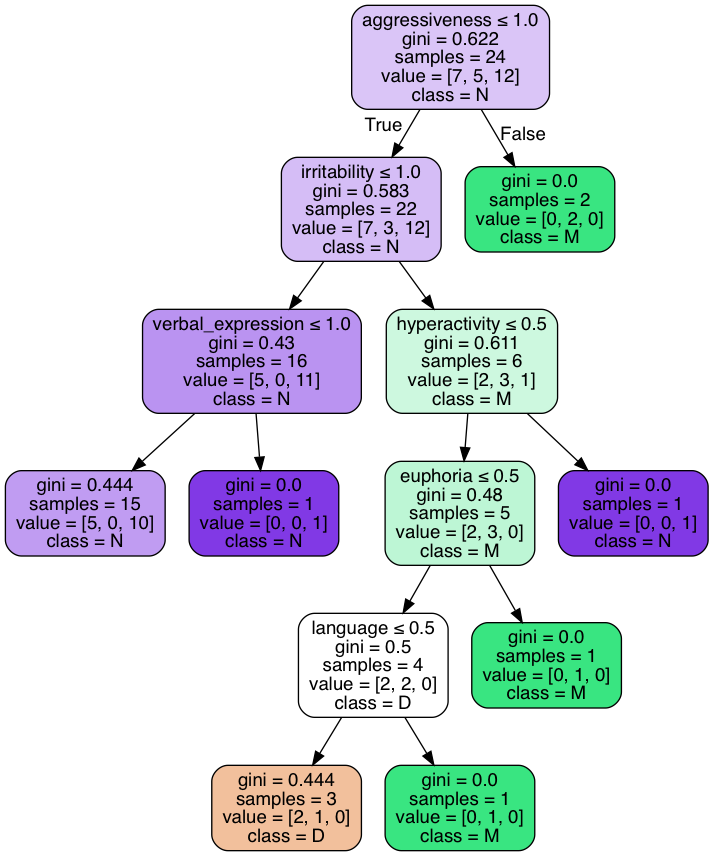

In [698]:
dot_data = StringIO()

export_graphviz(clf, out_file=dot_data,
                feature_names=young_episodes.loc[:,young_episodes.columns != "episode"].keys(),
                class_names=np.unique(young_episodes.episode),
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

#### HDRS

In [195]:
hamilton_episodes.head(2)

,depressed_mood,guilt,suicide,precocious_insomnia,medium_insomnia,verbal_expression,language,thought,late_insomnia,work,...,agitation,psychic_anxiety,somatic_anxiety,somatic_gastrointestinal_symptoms,somatic_general_symptoms,genital_symptoms,hypochondria,weight_loss,illness_awareness,episode
10,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,N
11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,N


First, we divide the data into training and testing

In [687]:
X_train, X_test, y_train, y_test = train_test_split(hamilton_episodes.loc[:, hamilton_episodes.columns != "episode"], 
                                                    hamilton_episodes["episode"], test_size=0.3)

Now, we apply the the classifier and check the accuracy score of the model:

In [197]:
clf = DecisionTreeClassifier(max_depth=5)
clf.fit(X_train, y_train)
scores = cross_val_score(clf, X_test, y_test)
print "Model accuracy: ", scores.mean()

Model accuracy:  0.783333333333


/usr/local/lib/python2.7/site-packages/sklearn/model_selection/_split.py:597: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


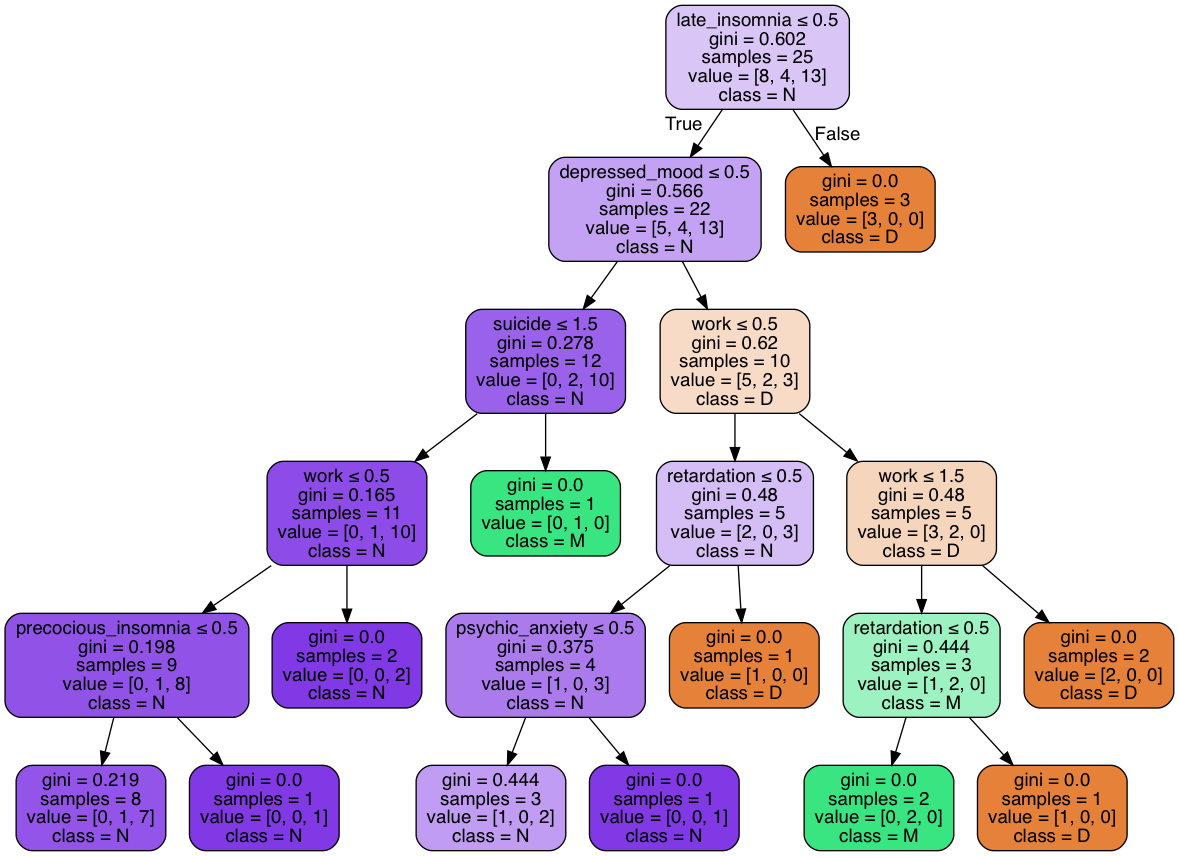

In [695]:
dot_data = StringIO()

export_graphviz(clf, out_file=dot_data,
                feature_names=hamilton_episodes.loc[:,hamilton_episodes.columns != "episode"].keys(),
                class_names=np.unique(hamilton_episodes.episode),
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

#### Interviews

In [199]:
interviews_episodes.head(2)

,mood,motivation,attention,irritability,anxiety,sleep_quality,nr_cigarettes,caffeine,active_time,episode
274,0,1,1,1,1,2,0,90,1470,N
230,-1,-1,2,1,1,3,24,120,1790,N


First, we divide the data into training and testing

In [699]:
X_train, X_test, y_train, y_test = train_test_split(interviews_episodes.loc[:, interviews_episodes.columns != "episode"], 
                                                    interviews_episodes["episode"], test_size=0.3)

Now, we apply the the classifier and check the accuracy score of the model:

In [201]:
clf = DecisionTreeClassifier(max_depth=10, min_samples_leaf=15)
clf.fit(X_train, y_train)
scores = cross_val_score(clf, X_test, y_test)
print "Model accuracy: ", scores.mean(),

Model accuracy:  0.697151806527


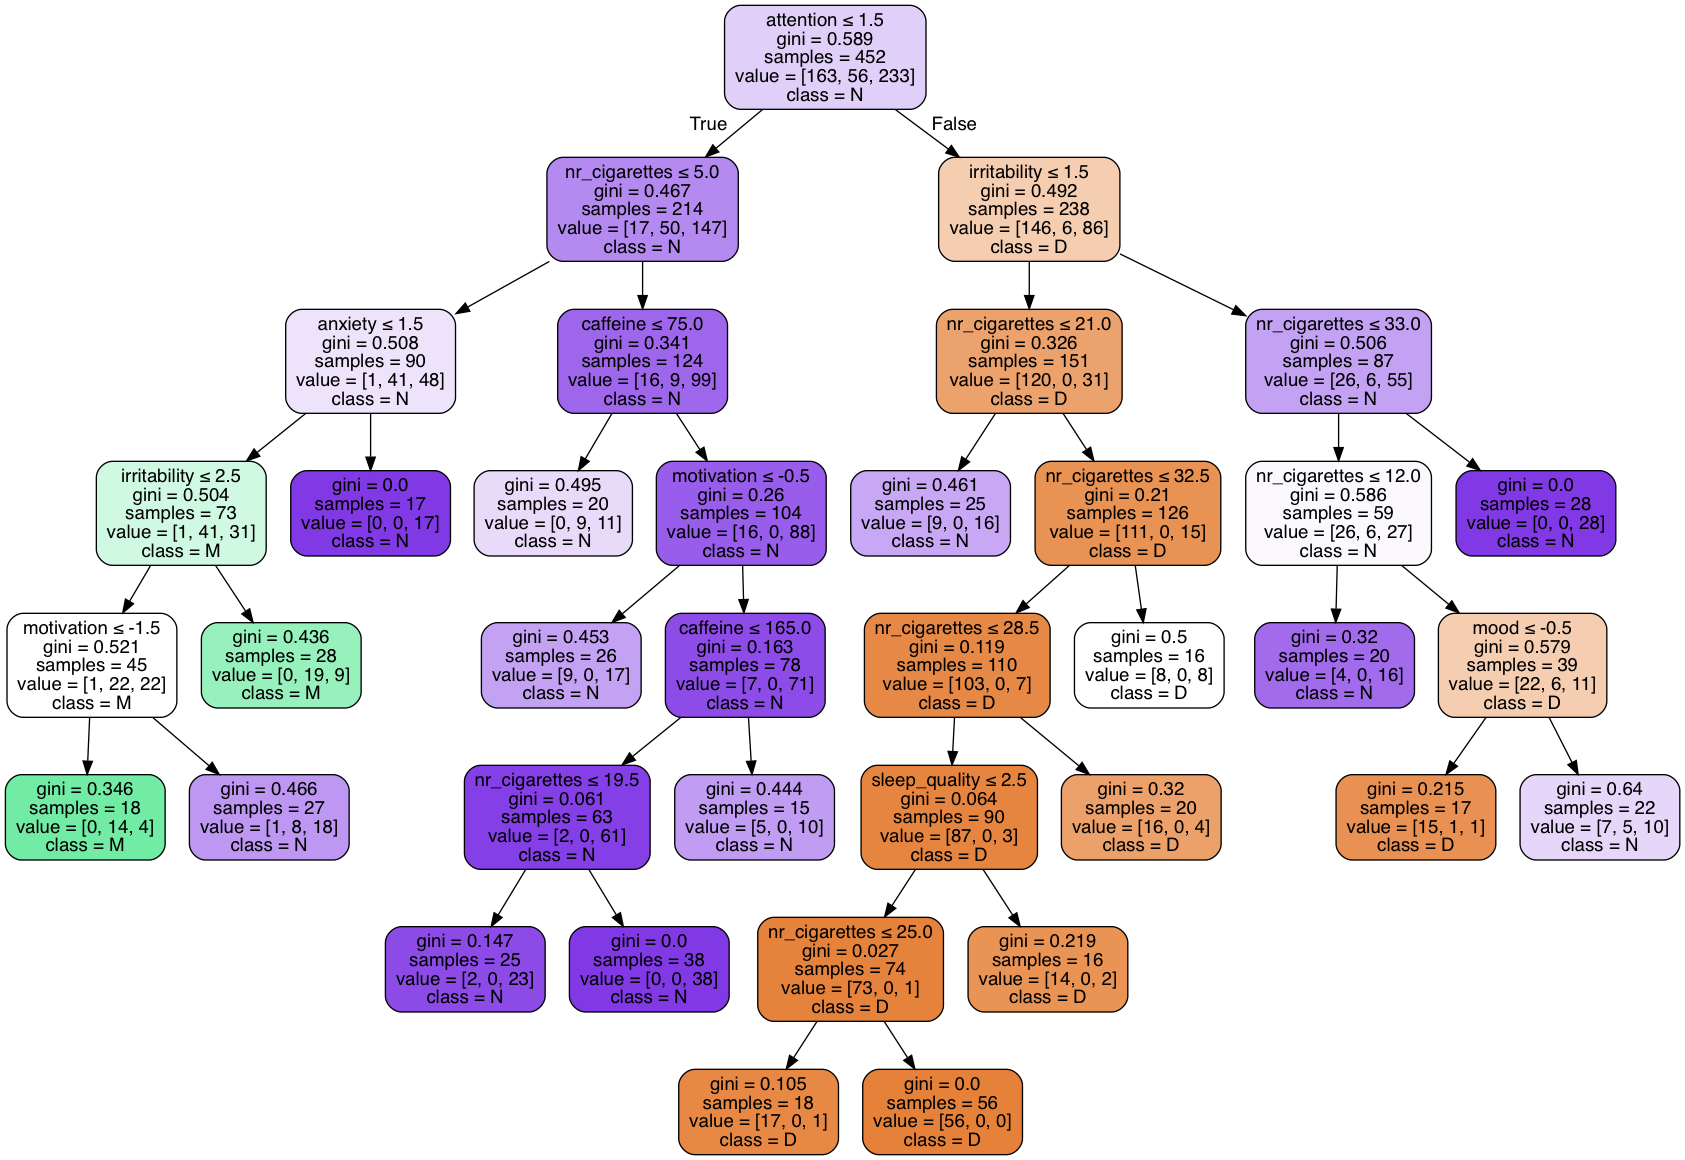

In [705]:
dot_data = StringIO()

export_graphviz(clf, out_file=dot_data,
                feature_names=interviews_episodes.loc[:,interviews_episodes.columns != "episode"].keys(),
                class_names=np.unique(interventions_episodes.episode),
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

#### Interventions

In [203]:
interventions_episodes.head(2)

,gaf,relief,episode
0,80,5,N
1,80,5,N


First, we divide the data into training and testing

In [709]:
X_train, X_test, y_train, y_test = train_test_split(interventions_episodes.loc[:, interventions_episodes.columns != "episode"], 
                                                    interventions_episodes["episode"], test_size=0.3)

Now, we apply the the classifier and check the accuracy score of the model:

In [205]:
clf = DecisionTreeClassifier(max_depth=5)
clf.fit(X_train, y_train)
scores = cross_val_score(clf, X_test, y_test)
print "Model accuracy: ", scores.mean()

Model accuracy:  0.439682539683


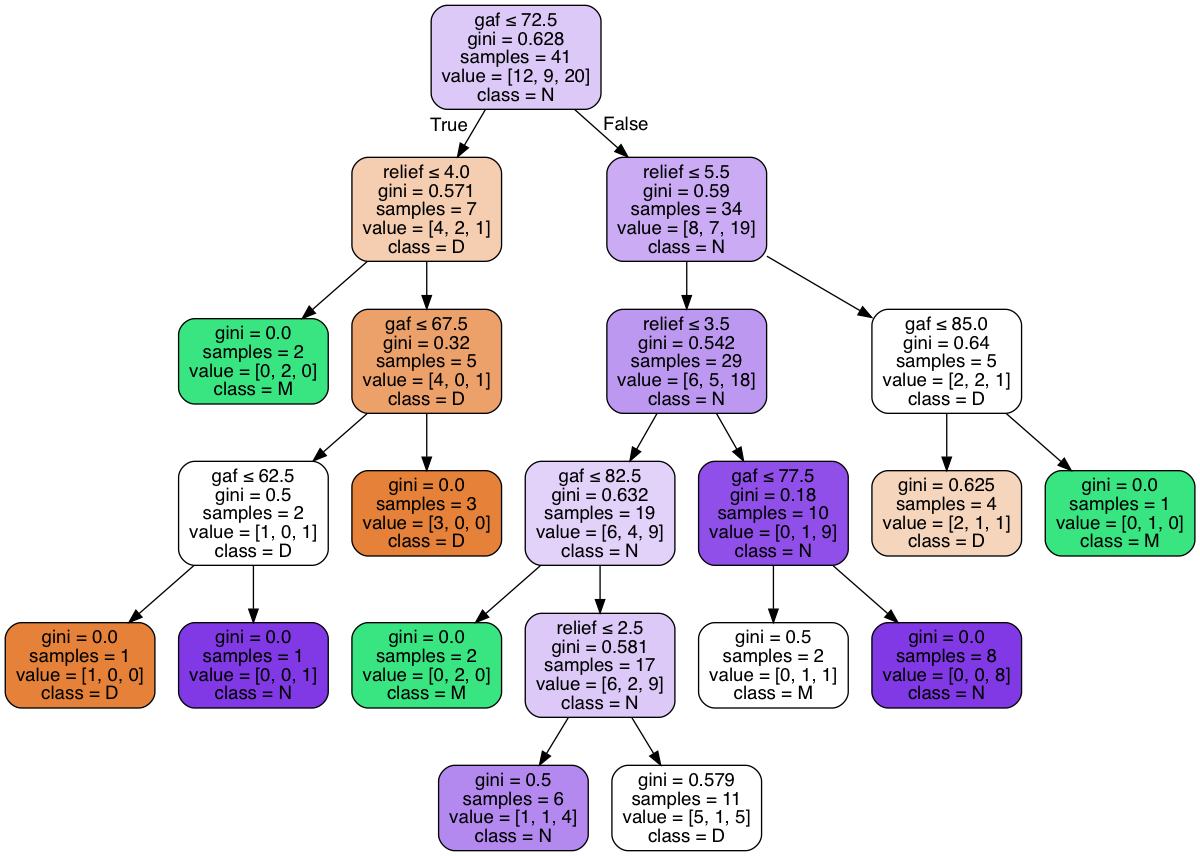

In [711]:
dot_data = StringIO()

export_graphviz(clf, out_file=dot_data,
                feature_names=interventions_episodes.loc[:,interventions_episodes.columns != "episode"].keys(),
                class_names=np.unique(interventions_episodes.episode),
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

#### YMRS and HDRS combined

In [207]:
ymrs_hdrs.head(2)

,euphoria,hyperactivity,irritability_ymrs,verbal_expression,aggressiveness,depressed_mood,guilt,suicide,precocious_insomnia,medium_insomnia,late_insomnia,work,retardation,agitation,psychic_anxiety,somatic_anxiety,somatic_general_symptoms,genital_symptoms,episode
9,0,1,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,N
10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,N


First, we divide the data into training and testing

In [712]:
X_train, X_test, y_train, y_test = train_test_split(ymrs_hdrs.loc[:, ymrs_hdrs.columns != "episode"], 
                                                    ymrs_hdrs["episode"], test_size=0.3)

Now, we apply the the classifier and check the accuracy score of the model:

In [209]:
clf = DecisionTreeClassifier(max_depth=10, min_samples_leaf=2)
clf.fit(X_train, y_train)
scores = cross_val_score(clf, X_test, y_test, cv=2)
print "Model accuracy: ", scores.mean()

Model accuracy:  0.625


In [713]:
clf = DecisionTreeClassifier(max_depth=5)
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

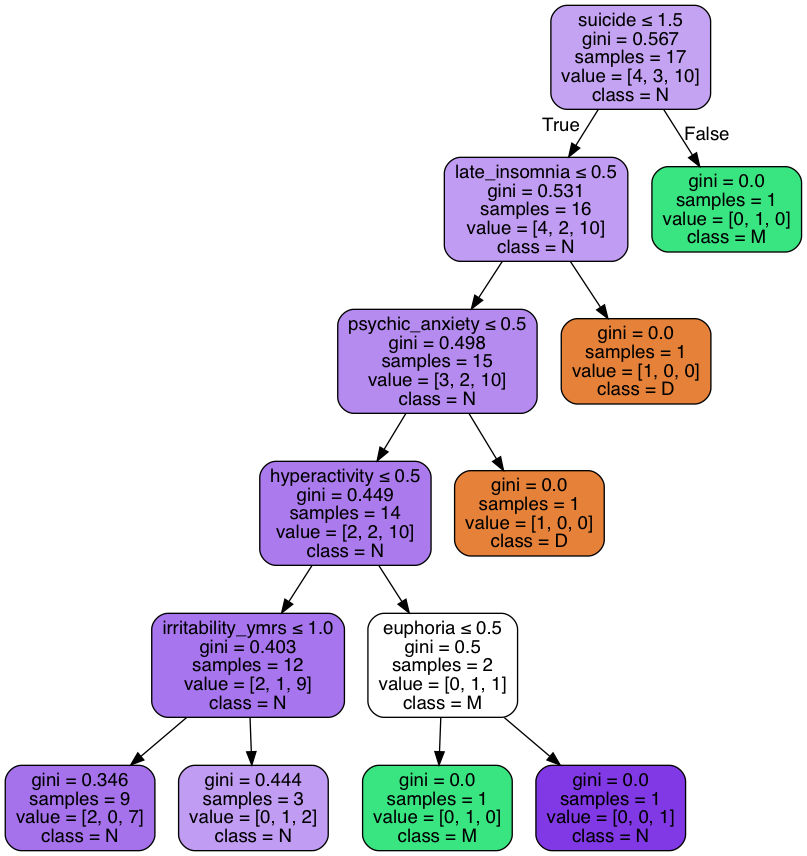

In [714]:
dot_data = StringIO()

export_graphviz(clf, out_file=dot_data,
                feature_names=ymrs_hdrs.loc[:,ymrs_hdrs.columns != "episode"].keys(),
                class_names=np.unique(ymrs_hdrs.episode),
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

#### Interviews and Interventions combined

In [211]:
interviews_interventions.head(2)

,gaf,relief,mood,motivation,attention,irritability,anxiety,sleep_quality,nr_cigarettes,caffeine,active_time,episode
0,80,5,2,2,3,3,3,3,34,150,1710,N
1,80,5,2,2,3,3,3,3,34,150,1710,N


In [212]:
len(interviews_interventions)

14

First, we divide the data into training and testing

In [719]:
X_train, X_test, y_train, y_test = train_test_split(interviews_interventions.loc[:, interviews_interventions.columns != "episode"], 
                                                    interviews_interventions["episode"], test_size=0.3)

Now, we apply the the classifier and check the accuracy score of the model:

In [214]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
scores = cross_val_score(clf, X_test, y_test, cv=2)
print "Model accuracy: ", scores.mean()

Model accuracy:  0.666666666667


In [720]:
clf = DecisionTreeClassifier(max_depth=5)
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

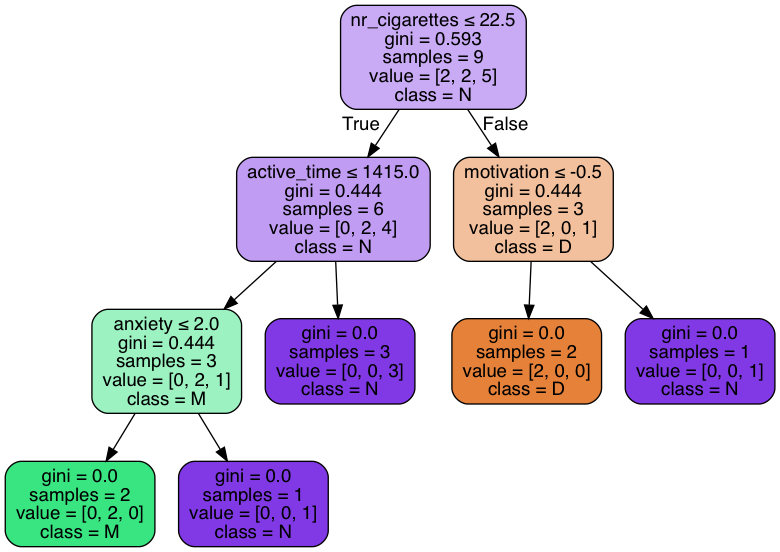

In [721]:
dot_data = StringIO()

export_graphviz(clf, out_file=dot_data,
                feature_names=interviews_interventions.loc[:,interviews_interventions.columns != "episode"].keys(),
                class_names=np.unique(interviews_interventions.episode),
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

### Random Forest

The Random Forest algorithm consists in an array of tree predictors in which every tree is depending on values of a random vector that is sampled with the exact same distribution for all the trees.

As for the Decision Tree algorithm, the decision rule selection criteria works by looking at each feature from the set of possible features individually and choosing the one that helps the most for giving the model an optimal fit.

First, we import the Random Forest classifier from the scikit-learn library:

In [216]:
from sklearn.ensemble import RandomForestClassifier

We can now proceed to check the score of the algorithms with all the data sets:

#### YMRS

In [217]:
young_episodes.head(2)

,euphoria,hyperactivity,sexual_impulse,sleep,irritability,verbal_expression,language,thought,aggressiveness,appearance,illness_awareness,episode
9,0,1,0,0,2,2,0,0,0,0,0,N
10,0,0,0,0,0,2,0,0,0,0,0,N


First, we divide the data into training and testing

In [218]:
X_train, X_test, y_train, y_test = train_test_split(young_episodes.loc[:,young_episodes.columns != "episode"], 
                                                    young_episodes["episode"], test_size=0.3)

Now, we apply the the classifier and check the accuracy score of the model. We use the '-1' value for the 'njobs' hyperparameter, which indicates that the number of jobs is equal to the number of cores of the processor:

In [219]:
clf = RandomForestClassifier(n_jobs=-1)
clf.fit(X_train, y_train)
scores = cross_val_score(clf, X_test, y_test)
print "Model accuracy: ", scores.mean()

/usr/local/lib/python2.7/site-packages/sklearn/model_selection/_split.py:597: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


Model accuracy:  0.383333333333


#### HDRS

In [220]:
hamilton_episodes.head(2)

,depressed_mood,guilt,suicide,precocious_insomnia,medium_insomnia,verbal_expression,language,thought,late_insomnia,work,...,agitation,psychic_anxiety,somatic_anxiety,somatic_gastrointestinal_symptoms,somatic_general_symptoms,genital_symptoms,hypochondria,weight_loss,illness_awareness,episode
10,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,N
11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,N


First, we divide the data into training and testing

In [221]:
X_train, X_test, y_train, y_test = train_test_split(hamilton_episodes.loc[:, hamilton_episodes.columns != "episode"], 
                                                    hamilton_episodes["episode"], test_size=0.3)

Now, we apply the the classifier and check the accuracy score of the model:

In [222]:
clf = RandomForestClassifier(n_jobs=-1)
clf.fit(X_train, y_train)
scores = cross_val_score(clf, X_test, y_test)
print "Model accuracy: ", scores.mean()

Model accuracy:  0.55


#### Interviews

In [223]:
interviews_episodes.head(2)

,mood,motivation,attention,irritability,anxiety,sleep_quality,nr_cigarettes,caffeine,active_time,episode
274,0,1,1,1,1,2,0,90,1470,N
230,-1,-1,2,1,1,3,24,120,1790,N


First, we divide the data into training and testing

In [224]:
X_train, X_test, y_train, y_test = train_test_split(interviews_episodes.loc[:, interviews_episodes.columns != "episode"], 
                                                    interviews_episodes["episode"], test_size=0.3)

Now, we apply the the classifier and check the accuracy score of the model:

In [225]:
clf = RandomForestClassifier(n_jobs=-1)
clf.fit(X_train, y_train)
scores = cross_val_score(clf, X_test, y_test)
print "Model accuracy: ", scores.mean()

Model accuracy:  0.717506798757


#### Interventions

In [226]:
interventions_episodes.head(2)

,gaf,relief,episode
0,80,5,N
1,80,5,N


In [526]:
len(interventions)

59

First, we divide the data into training and testing

In [227]:
X_train, X_test, y_train, y_test = train_test_split(interventions_episodes.loc[:, interventions_episodes.columns != "episode"], 
                                                    interventions_episodes["episode"], test_size=0.3)

Now, we apply the the classifier and check the accuracy score of the model:

In [228]:
clf = RandomForestClassifier(n_jobs=-1)
clf.fit(X_train, y_train)
scores = cross_val_score(clf, X_test, y_test)
print "Model accuracy: ", scores.mean()

Model accuracy:  0.652380952381


#### YMRS and HDRS combined

In [229]:
ymrs_hdrs.head(2)

,euphoria,hyperactivity,irritability_ymrs,verbal_expression,aggressiveness,depressed_mood,guilt,suicide,precocious_insomnia,medium_insomnia,late_insomnia,work,retardation,agitation,psychic_anxiety,somatic_anxiety,somatic_general_symptoms,genital_symptoms,episode
9,0,1,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,N
10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,N


In [527]:
len(ymrs_hdrs)

25

First, we divide the data into training and testing

In [230]:
X_train, X_test, y_train, y_test = train_test_split(ymrs_hdrs.loc[:, ymrs_hdrs.columns != "episode"], 
                                                    ymrs_hdrs["episode"], test_size=0.3)

Now, we apply the the classifier and check the accuracy score of the model:

In [231]:
clf = RandomForestClassifier(n_jobs=-1)
clf.fit(X_train, y_train)
scores = cross_val_score(clf, X_test, y_test, cv=2)
print "Model accuracy: ", scores.mean()

Model accuracy:  0.633333333333


#### Interviews and Interventions combined

In [232]:
interviews_interventions.head(2)

,gaf,relief,mood,motivation,attention,irritability,anxiety,sleep_quality,nr_cigarettes,caffeine,active_time,episode
0,80,5,2,2,3,3,3,3,34,150,1710,N
1,80,5,2,2,3,3,3,3,34,150,1710,N


First, we divide the data into training and testing

In [233]:
X_train, X_test, y_train, y_test = train_test_split(interviews_interventions.loc[:, interviews_interventions.columns != "episode"], 
                                                    interviews_interventions["episode"], test_size=0.3)

Now, we apply the the classifier and check the accuracy score of the model:

In [234]:
clf = RandomForestClassifier(n_jobs=-1)
clf.fit(X_train, y_train)
scores = cross_val_score(clf, X_test, y_test, cv=2)
print "Model accuracy: ", scores.mean()

/usr/local/lib/python2.7/site-packages/sklearn/model_selection/_split.py:597: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=2.
  % (min_groups, self.n_splits)), Warning)


Model accuracy:  0.166666666667


### SVM

This kind of classification algorithm aims to maximize the distance between the targets in a hyperplane. The support vectors are the vectors that define the hyperplane.

First, we import the SVM classifier from the scikit-learn library. We will use the Linear SVM classifier for this part, which uses a linear kernel:

In [235]:
from sklearn.svm import LinearSVC

This algorithm assumes that the data is in a standard range so, before applying the algorithms, we have to standardize the data. Let's import the library needed for this:

In [236]:
from sklearn.preprocessing import StandardScaler

We can define the scaler we are going to use for the different data sets:

In [237]:
scaler = StandardScaler()

We can now proceed to check the score of the algorithms with all the data sets:

#### YMRS

In [238]:
young_episodes.head(2)

,euphoria,hyperactivity,sexual_impulse,sleep,irritability,verbal_expression,language,thought,aggressiveness,appearance,illness_awareness,episode
9,0,1,0,0,2,2,0,0,0,0,0,N
10,0,0,0,0,0,2,0,0,0,0,0,N


In [239]:
len(young_episodes)

35

First, we divide the data into training and testing

In [240]:
X_train, X_test, y_train, y_test = train_test_split(young_episodes.loc[:,young_episodes.columns != "episode"], 
                                                    young_episodes["episode"], test_size=0.3)

In [241]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test);

In [242]:
clf = LinearSVC()
clf.fit(X_train, y_train)
scores = cross_val_score(clf, X_test, y_test)
print "Model accuracy: ", scores.mean()

Model accuracy:  0.383333333333


#### HDRS

In [243]:
hamilton_episodes.head(2)

,depressed_mood,guilt,suicide,precocious_insomnia,medium_insomnia,verbal_expression,language,thought,late_insomnia,work,...,agitation,psychic_anxiety,somatic_anxiety,somatic_gastrointestinal_symptoms,somatic_general_symptoms,genital_symptoms,hypochondria,weight_loss,illness_awareness,episode
10,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,N
11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,N


First, we divide the data into training and testing

In [244]:
X_train, X_test, y_train, y_test = train_test_split(hamilton_episodes.loc[:, hamilton_episodes.columns != "episode"], 
                                                    hamilton_episodes["episode"], test_size=0.3)

In [245]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test);

In [246]:
clf = LinearSVC()
clf.fit(X_train, y_train)
scores = cross_val_score(clf, X_test, y_test)
print "Model accuracy: ", scores.mean()

Model accuracy:  0.355555555556


#### Interviews

In [247]:
interviews_episodes.head(2)

,mood,motivation,attention,irritability,anxiety,sleep_quality,nr_cigarettes,caffeine,active_time,episode
274,0,1,1,1,1,2,0,90,1470,N
230,-1,-1,2,1,1,3,24,120,1790,N


First, we divide the data into training and testing

In [248]:
X_train, X_test, y_train, y_test = train_test_split(interviews_episodes.loc[:, interviews_episodes.columns != "episode"], 
                                                    interviews_episodes["episode"], test_size=0.3)

In [249]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test);

In [250]:
clf = LinearSVC()
clf.fit(X_train, y_train)
scores = cross_val_score(clf, X_test, y_test)
print "Model accuracy: ", scores.mean()

Model accuracy:  0.67723880597


#### Interventions

In [251]:
interventions_episodes.head(2)

,gaf,relief,episode
0,80,5,N
1,80,5,N


First, we divide the data into training and testing

In [252]:
X_train, X_test, y_train, y_test = train_test_split(interventions_episodes.loc[:, interventions_episodes.columns != "episode"], 
                                                    interventions_episodes["episode"], test_size=0.3)

In [253]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test);

In [254]:
clf = LinearSVC()
clf.fit(X_train, y_train)
scores = cross_val_score(clf, X_test, y_test)
print "Model accuracy: ", scores.mean()

Model accuracy:  0.566666666667


#### YMRS and HDRS combined

In [255]:
ymrs_hdrs.head(2)

,euphoria,hyperactivity,irritability_ymrs,verbal_expression,aggressiveness,depressed_mood,guilt,suicide,precocious_insomnia,medium_insomnia,late_insomnia,work,retardation,agitation,psychic_anxiety,somatic_anxiety,somatic_general_symptoms,genital_symptoms,episode
9,0,1,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,N
10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,N


In [256]:
len(ymrs_hdrs)

25

First, we divide the data into training and testing

In [260]:
X_train, X_test, y_train, y_test = train_test_split(ymrs_hdrs.loc[:, ymrs_hdrs.columns != "episode"], 
                                                    ymrs_hdrs["episode"], test_size=0.3)

In [261]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test);

In [263]:
clf = LinearSVC()
clf.fit(X_train, y_train)
scores = cross_val_score(clf, X_test, y_test, cv=2)
print "Model accuracy: ", scores.mean()

Model accuracy:  0.7


#### Interviews and Interventions combined

In [264]:
interviews_interventions.head(2)

,gaf,relief,mood,motivation,attention,irritability,anxiety,sleep_quality,nr_cigarettes,caffeine,active_time,episode
0,80,5,2,2,3,3,3,3,34,150,1710,N
1,80,5,2,2,3,3,3,3,34,150,1710,N


In [265]:
len(interviews_interventions)

14

First, we divide the data into training and testing

In [278]:
X_train, X_test, y_train, y_test = train_test_split(interviews_interventions.loc[:, interviews_interventions.columns != "episode"], 
                                                    interviews_interventions["episode"], test_size=0.3)

In [279]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test);

In [281]:
clf = LinearSVC()
clf.fit(X_train, y_train)
scores = cross_val_score(clf, X_test, y_test, cv=2)
print "Model accuracy: ", scores.mean()

Model accuracy:  0.416666666667


### Logistic Regression

The mathematical concept behind a logistic regression model is the natural logarithm of an odds ratio between two variables, also called logit.

First, we import the Logistic Regression classifier from the scikit-learn library:

In [282]:
from sklearn.linear_model import LogisticRegression

We can now proceed to check the score of the algorithms with all the data sets:

#### YMRS

In [283]:
young_episodes.head(2)

,euphoria,hyperactivity,sexual_impulse,sleep,irritability,verbal_expression,language,thought,aggressiveness,appearance,illness_awareness,episode
9,0,1,0,0,2,2,0,0,0,0,0,N
10,0,0,0,0,0,2,0,0,0,0,0,N


First, we divide the data into training and testing:

In [284]:
X_train, X_test, y_train, y_test = train_test_split(young_episodes.loc[:,young_episodes.columns != "episode"], 
                                                    young_episodes["episode"], test_size=0.3)

In [285]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
scores = cross_val_score(clf, X_test, y_test, cv=3)
print "Model accuracy: ", scores.mean()

Model accuracy:  0.755555555556


#### HDRS

In [286]:
hamilton_episodes.head(2)

,depressed_mood,guilt,suicide,precocious_insomnia,medium_insomnia,verbal_expression,language,thought,late_insomnia,work,...,agitation,psychic_anxiety,somatic_anxiety,somatic_gastrointestinal_symptoms,somatic_general_symptoms,genital_symptoms,hypochondria,weight_loss,illness_awareness,episode
10,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,N
11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,N


First, we divide the data into training and testing:

In [287]:
X_train, X_test, y_train, y_test = train_test_split(hamilton_episodes.loc[:,hamilton_episodes.columns != "episode"], 
                                                    hamilton_episodes["episode"], test_size=0.3)

In [288]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
scores = cross_val_score(clf, X_test, y_test, cv=3)
print "Model accuracy: ", scores.mean()

Model accuracy:  0.616666666667


#### Interviews

In [289]:
interviews_episodes.head(2)

,mood,motivation,attention,irritability,anxiety,sleep_quality,nr_cigarettes,caffeine,active_time,episode
274,0,1,1,1,1,2,0,90,1470,N
230,-1,-1,2,1,1,3,24,120,1790,N


First, we divide the data into training and testing:

In [290]:
X_train, X_test, y_train, y_test = train_test_split(interviews_episodes.loc[:,interviews_episodes.columns != "episode"], 
                                                    interviews_episodes["episode"], test_size=0.3)

In [291]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
scores = cross_val_score(clf, X_test, y_test, cv=3)
print "Model accuracy: ", scores.mean()

Model accuracy:  0.670995670996


#### Interventions

In [292]:
interventions_episodes.head(2)

,gaf,relief,episode
0,80,5,N
1,80,5,N


First, we divide the data into training and testing:

In [293]:
X_train, X_test, y_train, y_test = train_test_split(interventions_episodes.loc[:,interventions_episodes.columns != "episode"], 
                                                    interventions_episodes["episode"], test_size=0.3)

In [294]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
scores = cross_val_score(clf, X_test, y_test, cv=3)
print "Model accuracy: ", scores.mean()

Model accuracy:  0.509523809524


#### YMRS and HDRS combined

In [295]:
ymrs_hdrs.head(2)

,euphoria,hyperactivity,irritability_ymrs,verbal_expression,aggressiveness,depressed_mood,guilt,suicide,precocious_insomnia,medium_insomnia,late_insomnia,work,retardation,agitation,psychic_anxiety,somatic_anxiety,somatic_general_symptoms,genital_symptoms,episode
9,0,1,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,N
10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,N


First, we divide the data into training and testing:

In [296]:
X_train, X_test, y_train, y_test = train_test_split(ymrs_hdrs.loc[:,ymrs_hdrs.columns != "episode"], 
                                                    ymrs_hdrs["episode"], test_size=0.3)

In [297]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
scores = cross_val_score(clf, X_test, y_test, cv=3)
print "Model accuracy: ", scores.mean()

Model accuracy:  0.333333333333


#### Interviews and Interventions combined

In [298]:
interviews_interventions.head(2)

,gaf,relief,mood,motivation,attention,irritability,anxiety,sleep_quality,nr_cigarettes,caffeine,active_time,episode
0,80,5,2,2,3,3,3,3,34,150,1710,N
1,80,5,2,2,3,3,3,3,34,150,1710,N


First, we divide the data into training and testing:

In [299]:
X_train, X_test, y_train, y_test = train_test_split(interviews_interventions.loc[:,interviews_interventions.columns != "episode"], 
                                                    interviews_interventions["episode"], test_size=0.3)

In [300]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
scores = cross_val_score(clf, X_test, y_test, cv=3)
print "Model accuracy: ", scores.mean()

Model accuracy:  0.833333333333


### KNN

The k-Nearest-Neighbors algorithm is a very simple classification algorithms. It might give some interesting results with data set as small as the ones we have.

First, we import the KNN classifier from the scikit-learn library:

In [301]:
from sklearn.neighbors import KNeighborsClassifier

We can now proceed to check the score of the algorithms with all the data sets:

#### YMRS

In [302]:
young_episodes.head(2)

,euphoria,hyperactivity,sexual_impulse,sleep,irritability,verbal_expression,language,thought,aggressiveness,appearance,illness_awareness,episode
9,0,1,0,0,2,2,0,0,0,0,0,N
10,0,0,0,0,0,2,0,0,0,0,0,N


First, we divide the data into training and testing:

In [303]:
X_train, X_test, y_train, y_test = train_test_split(young_episodes.loc[:,young_episodes.columns != "episode"], 
                                                    young_episodes["episode"], test_size=0.3)

In [304]:
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
scores = cross_val_score(clf, X_test, y_test, cv=3)
print "Model accuracy: ", scores.mean()

Model accuracy:  0.466666666667


#### HDRS

In [305]:
hamilton_episodes.head(2)

,depressed_mood,guilt,suicide,precocious_insomnia,medium_insomnia,verbal_expression,language,thought,late_insomnia,work,...,agitation,psychic_anxiety,somatic_anxiety,somatic_gastrointestinal_symptoms,somatic_general_symptoms,genital_symptoms,hypochondria,weight_loss,illness_awareness,episode
10,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,N
11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,N


First, we divide the data into training and testing:

In [306]:
X_train, X_test, y_train, y_test = train_test_split(hamilton_episodes.loc[:,hamilton_episodes.columns != "episode"], 
                                                    hamilton_episodes["episode"], test_size=0.3)

In [307]:
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
scores = cross_val_score(clf, X_test, y_test, cv=3)
print "Model accuracy: ", scores.mean()

Model accuracy:  0.355555555556


#### Interviews

In [308]:
interviews_episodes.head(2)

,mood,motivation,attention,irritability,anxiety,sleep_quality,nr_cigarettes,caffeine,active_time,episode
274,0,1,1,1,1,2,0,90,1470,N
230,-1,-1,2,1,1,3,24,120,1790,N


First, we divide the data into training and testing:

In [309]:
X_train, X_test, y_train, y_test = train_test_split(interviews_episodes.loc[:,interviews_episodes.columns != "episode"], 
                                                    interviews_episodes["episode"], test_size=0.3)

In [310]:
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
scores = cross_val_score(clf, X_test, y_test, cv=3)
print "Model accuracy: ", scores.mean()

Model accuracy:  0.548883061383


#### Interventions

In [311]:
interventions_episodes.head(2)

,gaf,relief,episode
0,80,5,N
1,80,5,N


First, we divide the data into training and testing:

In [312]:
X_train, X_test, y_train, y_test = train_test_split(interventions_episodes.loc[:,interventions_episodes.columns != "episode"], 
                                                    interventions_episodes["episode"], test_size=0.3)

In [313]:
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
scores = cross_val_score(clf, X_test, y_test, cv=3)
print "Model accuracy: ", scores.mean()

Model accuracy:  0.241666666667


#### YMRS and HDRS combined

In [314]:
ymrs_hdrs.head(2)

,euphoria,hyperactivity,irritability_ymrs,verbal_expression,aggressiveness,depressed_mood,guilt,suicide,precocious_insomnia,medium_insomnia,late_insomnia,work,retardation,agitation,psychic_anxiety,somatic_anxiety,somatic_general_symptoms,genital_symptoms,episode
9,0,1,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,N
10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,N


In [315]:
len(ymrs_hdrs)

25

First, we divide the data into training and testing:

In [316]:
X_train, X_test, y_train, y_test = train_test_split(ymrs_hdrs.loc[:,ymrs_hdrs.columns != "episode"], 
                                                    ymrs_hdrs["episode"], test_size=0.3)

In [317]:
clf = KNeighborsClassifier(n_neighbors=4)
clf.fit(X_train, y_train)
scores = cross_val_score(clf, X_test, y_test, cv=3)
print "Model accuracy: ", scores.mean()

Model accuracy:  0.722222222222


#### Interviews and Interventions combined

In [318]:
interviews_interventions.head(2)

,gaf,relief,mood,motivation,attention,irritability,anxiety,sleep_quality,nr_cigarettes,caffeine,active_time,episode
0,80,5,2,2,3,3,3,3,34,150,1710,N
1,80,5,2,2,3,3,3,3,34,150,1710,N


First, we divide the data into training and testing:

In [319]:
X_train, X_test, y_train, y_test = train_test_split(interviews_interventions.loc[:,interviews_interventions.columns != "episode"], 
                                                    interviews_interventions["episode"], test_size=0.3)

In [321]:
clf = KNeighborsClassifier(n_neighbors=2)
clf.fit(X_train, y_train)
scores = cross_val_score(clf, X_test, y_test, cv=3)
print "Model accuracy: ", scores.mean()

Model accuracy:  0.222222222222


### Results and predictions

As a conclusion of this study, we are going to select the algorithms we think might give the best model for trying to classify the state a patient is. 

An important criteria when choosing the appropriate algorithm is the size of the data set, because a data set with more data will have less risk of being overfitted when applying an algorithm on it.

Let's check the size of each of the data sets. This will help us see if the score is overfitted: 

In [322]:
print "Number of rows in YDRS dataframe:", len(young_episodes.index)
print "Number of rows in HDRS dataframe:", len(hamilton_episodes.index)
print "Number of rows in interview dataframe:", len(interviews_episodes.index)
print "Number of rows in intervention dataframe:", len(interventions_episodes.index)
print "Number of rows in YDRS-HDRS dataframe:", len(ymrs_hdrs.index)
print "Number of rows in interview-intervention dataframe:", len(interviews_interventions.index)

Number of rows in YDRS dataframe: 35
Number of rows in HDRS dataframe: 36
Number of rows in interview dataframe: 647
Number of rows in intervention dataframe: 59
Number of rows in YDRS-HDRS dataframe: 25
Number of rows in interview-intervention dataframe: 14


We can observe that the interview data set has the highest amount of data, followed by the intervention data set. The rest of the data sets have very little entries, so we have to check if the accuracies are too high, which probably means that the models are overfitted.

Let's summarize the scores of all the algorithms saying if the accuracies are too low or too good to be true (overfitted), and select the ones we will use for the prediction:

#### Decision Tree

* **YMRS:** Accuracy of 36%, which is too low to even consider.
* **HDRS:** Accuracy of 78%, which is too high for such a small data set.
* **Interviews:** Accuracy of 70%. We might consider this algorithm for the prediction.
* **Interventions:** Accuracy of 44%, which is too low to even consider.
* **YMRS-HDRS:** Accuracy of 63%. We are not going to consider it because of the small amount of data it contains. The level of confidence is too low.
* **Interviews-Interventions:** Accuracy of 67%, which is too high for a data set with 14 entries.

#### Random Forest

* **YMRS:** Accuracy of 38%, which is too low to even consider.
* **HDRS:** Accuracy of 55%, which is too low to even consider.
* **Interviews:** Accuracy of 72%. We might consider this algorithm for the prediction.
* **Interventions:** Accuracy of 65%, which is not high enough if we compare it with the best scores obtained.
* **YMRS-HDRS:** Accuracy of 63%, which is not high enough if we compare it with the best scores obtained.
* **Interviews-Interventions:** Accuracy of 17%, which is too low to even consider.

#### SVM

* **YMRS:** Accuracy of 38%, which is too low to even consider.
* **HDRS:** Accuracy of 36%, which is too low to even consider.
* **Interviews:** Accuracy of 68%. We might consider this algorithm for the prediction.
* **Interventions:** Accuracy of 57%, which is too low to even consider.
* **YMRS-HDRS:** Accuracy of 70%, which is too high for such a small data set.
* **Interviews-Interventions:** Accuracy of 42%, which is too low to even consider.

#### Logistic Regression

* **YMRS:** Accuracy of 76%, which is too high for such a small data set.
* **HDRS:** Accuracy of 62%, which is not high enough if we compare it with the best scores obtained.
* **Interviews:** Accuracy of 67%. We might consider this algorithm for the prediction.
* **Interventions:** Accuracy of 51%, which is too low to even consider.
* **YMRS-HDRS:** Accuracy of 33%, which is too low to even consider.
* **Interviews-Interventions:** Accuracy of 83%, which is too high for such a small data set.

#### KNN

* **YMRS:** Accuracy of 47%, which is too low to even consider.
* **HDRS:** Accuracy of 35%, which is too low to even consider.
* **Interviews:** Accuracy of 55%, which is too low to even consider.
* **Interventions:** Accuracy of 24%, which is too low to even consider.
* **YMRS-HDRS:** Accuracy of 72%, which is too high for such a small data set.
* **Interviews-Interventions:** Accuracy of 22%, which is too low to even consider.

The accuracies of the different models conclude that the *KNN* algorithm is not worth to consider with any of the data sets. We are going to use the *Interview* data set with the *Decision Tree*, *Random Forest*, *SVM* and *Logistic Regression* to try making a prediction, because the amount of data is much higher than the other data sets and the scores are reasonable.

In [532]:
X_train, X_test, y_train, y_test = train_test_split(interviews_episodes.loc[:,interviews_episodes.columns != "episode"], 
                                                    interviews_episodes["episode"], test_size=0.3)

In [533]:
dt = DecisionTreeClassifier(max_depth=10, min_samples_leaf=15)
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=15, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [534]:
rf = RandomForestClassifier(n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [535]:
svm = LinearSVC()
svm.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [536]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [537]:
interviews_episodes.head()

,mood,motivation,attention,irritability,anxiety,sleep_quality,nr_cigarettes,caffeine,active_time,episode
274,0,1,1,1,1,2,0,90,1470,N
230,-1,-1,2,1,1,3,24,120,1790,N
241,0,-1,2,1,1,1,24,90,1545,N
0,2,2,3,3,3,3,34,150,1710,N
1,2,2,3,3,3,3,38,150,1770,N


In [541]:
def check_state(classifier, data):
    prediction = classifier.predict(data)[0]
    if prediction == 'D':
        diagnosis = "The patient could be tending towards a Depression episode"
    elif prediction == 'M':
        diagnosis = "The patient could be tending towards a Mania episode"
    else:
        diagnosis = "The patient is in a Euthymic state"
    return diagnosis

In [542]:
from random import randint

In [543]:
n = 0
while n < 50:
    variables = {}
    variables['mood'] = randint(-3, 3)
    variables['motivation'] = randint(-3, 3)
    variables['attention'] = randint(0, 4)
    variables['irritability'] = randint(0, 4)
    variables['anxiety'] = randint(0, 4)
    variables['sleep_quality'] = randint(0, 4)
    variables['nr_cigarettes'] = randint(0, 40)
    variables['caffeine'] = randint(0, 250)
    variables['active_time'] = randint(200, 1800)
    
    test = np.array([variables['mood'], variables['motivation'], variables['attention'],
                variables['irritability'], variables['anxiety'], variables['sleep_quality'],
                variables['nr_cigarettes'], variables['caffeine'], variables['active_time']])
    
    print "--------------------------------------------"
    print "PATIENT ", n + 1
    print "--------------------------------------------"
    print "Mood: ", variables['mood']
    print "Motivation: ", variables['motivation']
    print "Attention: ", variables['attention']
    print "Irritability: ", variables['irritability']
    print "Anxiety: ", variables['anxiety']
    print "Sleep quality: ", variables['sleep_quality']
    print "Number of cigarettes: ", variables['nr_cigarettes']
    print "Caffeine: ", variables['caffeine']
    print "Active time: ", variables['active_time']
    
    test = test.reshape(1, -1)
    print "--------------------------------------------"
    print "PREDICTIONS"
    print "--------------------------------------------"
    print "- Decision Tree prediction: ", check_state(dt, test)
    print "- Random Forest prediction: ", check_state(rf, test)
    print "- Logistic Regression prediction: ", check_state(lr, test)
    test = scaler.fit_transform(test)
    print "- SVM prediction: ", check_state(svm, test)
    print "\n"
    
    n += 1

--------------------------------------------
PATIENT  1
--------------------------------------------
Mood:  1
Motivation:  -1
Attention:  1
Irritability:  0
Anxiety:  0
Sleep quality:  1
Number of cigarettes:  38
Caffeine:  158
Active time:  276
--------------------------------------------
PREDICTIONS
--------------------------------------------
- Decision Tree prediction:  The patient is in a Euthymic state
- Random Forest prediction:  The patient is in a Euthymic state
- Logistic Regression prediction:  The patient could be tending towards a Depression episode
- SVM prediction:  The patient is in a Euthymic state


--------------------------------------------
PATIENT  2
--------------------------------------------
Mood:  2
Motivation:  -1
Attention:  4
Irritability:  0
Anxiety:  2
Sleep quality:  2
Number of cigarettes:  36
Caffeine:  226
Active time:  1029
--------------------------------------------
PREDICTIONS
--------------------------------------------
- Decision Tree prediction

- Random Forest prediction:  The patient is in a Euthymic state
- Logistic Regression prediction:  The patient is in a Euthymic state
- SVM prediction:  The patient is in a Euthymic state


--------------------------------------------
PATIENT  15
--------------------------------------------
Mood:  -3
Motivation:  -3
Attention:  1
Irritability:  2
Anxiety:  0
Sleep quality:  1
Number of cigarettes:  13
Caffeine:  250
Active time:  1750
--------------------------------------------
PREDICTIONS
--------------------------------------------
- Decision Tree prediction:  The patient is in a Euthymic state
- Random Forest prediction:  The patient is in a Euthymic state
- Logistic Regression prediction:  The patient could be tending towards a Depression episode
- SVM prediction:  The patient is in a Euthymic state


--------------------------------------------
PATIENT  16
--------------------------------------------
Mood:  1
Motivation:  1
Attention:  0
Irritability:  0
Anxiety:  2
Sleep quality

- Random Forest prediction:  The patient is in a Euthymic state
- Logistic Regression prediction:  The patient is in a Euthymic state
- SVM prediction:  The patient is in a Euthymic state


--------------------------------------------
PATIENT  29
--------------------------------------------
Mood:  -3
Motivation:  1
Attention:  0
Irritability:  0
Anxiety:  0
Sleep quality:  2
Number of cigarettes:  40
Caffeine:  191
Active time:  667
--------------------------------------------
PREDICTIONS
--------------------------------------------
- Decision Tree prediction:  The patient is in a Euthymic state
- Random Forest prediction:  The patient is in a Euthymic state
- Logistic Regression prediction:  The patient is in a Euthymic state
- SVM prediction:  The patient is in a Euthymic state


--------------------------------------------
PATIENT  30
--------------------------------------------
Mood:  -3
Motivation:  -1
Attention:  1
Irritability:  3
Anxiety:  4
Sleep quality:  0
Number of cigarett

- Random Forest prediction:  The patient is in a Euthymic state
- Logistic Regression prediction:  The patient is in a Euthymic state
- SVM prediction:  The patient is in a Euthymic state


--------------------------------------------
PATIENT  43
--------------------------------------------
Mood:  3
Motivation:  0
Attention:  2
Irritability:  0
Anxiety:  2
Sleep quality:  2
Number of cigarettes:  26
Caffeine:  94
Active time:  1505
--------------------------------------------
PREDICTIONS
--------------------------------------------
- Decision Tree prediction:  The patient could be tending towards a Depression episode
- Random Forest prediction:  The patient could be tending towards a Depression episode
- Logistic Regression prediction:  The patient could be tending towards a Depression episode
- SVM prediction:  The patient is in a Euthymic state


--------------------------------------------
PATIENT  44
--------------------------------------------
Mood:  2
Motivation:  0
Attention:  4

The classifier that seems to make the most coherent predictions is the *Random Forest* classifier, so we proceed to dump it in order to use it externally:

In [391]:
import  cPickle

with open("rf.pkl", "wb") as fid:
    cPickle.dump(rf, fid)